# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 #pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
#!pip install package-name --no-warn-script-location
#!pip install --upgrade scikit-learn
#!pip install pandas==2.1.4
#!pip install seaborn==0.13.0
#!pip install matplotlib==3.7.1
#!pip install numpy==1.25.2
#!pip install scikit-learn==1.2.2
#!pip install sklearn-pandas==2.2.0


In [2]:
# Import
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Read_data=pd.read_csv("/content/sample_data/Loan_Modelling.csv")

# Data Overview

* Observations
* Sanity checks
* Data Preprocessing
* Feature Engineering

#View the first and last 5 rows of the dataset.

In [5]:
#View top 5 rows of the data
Read_data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#View bottom 5 rows of the data
Read_data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Checking for duplicate entries in the data

In [7]:
Read_data.duplicated().sum()

0

Data does not have duplicate records

#Understand the shape of the dataset.

In [8]:
# checking the shape of the data
Read_data.shape

print("There are ",Read_data.shape[0],"rows and",Read_data.shape[1],"columns")

There are  5000 rows and 14 columns


#Check the data types of the columns for the dataset

In [9]:
#Understanding the Dataset
Read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:

There are 13 Data Attributes.
There is only 1 Float Dataype column, all other columns seems to have integer which is numeric  datatypes. All the columns have 5000 observations.

There are 7 Categorical variables -

  1) Education
  
  2) Personal_Loan "TARGET VARIABLE"


  3) Securities_Account

  4) CD_Account

  5) Online  

  6) CreditCard
  
  7) Family


There are 7 Numeric variables -

1) ID

2) Age

3) Experience

4) Income

5) CCAvg

6) ZIP CODE

7) Mortgage


#Checking the Statistical Summary

In [10]:
Read_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations:
* `Income:` Average income of a family is 73,000 (73 K). There is a large difference between 75th percentile and Max Salary(98K comapred to 224K) . There is possibilities for Outliers for this Data attribute.
* `Age:`Average age seems to be 45 years . The Median seems to be close to Mean . The data element seems to be evenly distributed and chances of outliers seems low.

* `Education and professional experience:`Average years of professional experience of the customer seems to be 20 year with minimum of undergrad education

* `Family:` On average there are atleast 2 members in a Family . 75 % of the applican't family has less than equal to 3 family members.
* `CCAVG`: On average , Credit card spending is approximately 2000 USD . While median of  spending was found to be  1500 USD.

* `Mortgage`: The average mortgage seems to be 56,000 . There seems to be a huge difference between the 75th percentile (101K) and Max value(635K) indicating the presence of outliers


In [11]:
Loan = Read_data.copy() # making a copy of the data
print(Loan)

        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0         

# Dropping columns

In [12]:
Loan = Loan.drop(['ID'], axis=1)

# Data Preprocessing

### Checking for Anomalous Values

####Sanity Checks

In [13]:
#Checking for Null / Missing values
Null_perc = round(100*(Loan.isnull().sum()/len(Loan.index)),2)
print(Null_perc)

Age                   0.0
Experience            0.0
Income                0.0
ZIPCode               0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal_Loan         0.0
Securities_Account    0.0
CD_Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64


Observations : No Nulls were found

In [14]:
#Checking for unique values
df= Loan
def check_uniqueness(df):
    for column in df.columns:
        if df[column].nunique() == len(df):
            print(f"{column} has unique values.")
        else:
            print(f"{column} contains duplicate values.")


#'Loan' is our DataFrame
check_uniqueness(Loan)

Age contains duplicate values.
Experience contains duplicate values.
Income contains duplicate values.
ZIPCode contains duplicate values.
Family contains duplicate values.
CCAvg contains duplicate values.
Education contains duplicate values.
Mortgage contains duplicate values.
Personal_Loan contains duplicate values.
Securities_Account contains duplicate values.
CD_Account contains duplicate values.
Online contains duplicate values.
CreditCard contains duplicate values.


# Distinct values of Experience

In [15]:
#Checking for distinct values for each data attribute
def print_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    print(f"Distinct values in column '{column_name}':")
    sorted_unique_values = sorted(unique_values, reverse=False)
    #for value in unique_values:
    for value in sorted_unique_values:
        print(value)

#using the function print_unique_values
print_unique_values(Loan, 'Experience')

Distinct values in column 'Experience':
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


Observation: Experience can't be negative . This attribute Needs cleaning . **Anomalous Values exist **

Using cleaning technique of imputation by median or Mean can be used but needs to be checked for Skewness before we use this technique.

We need to remember that this data attribute is not a categorical variable and hence will not need imputation by Mode method.

We can replace the values with Positive values.

Alternately we can even drop the records based on the count after we perform impact analysis of the loss of that data.

In [16]:
#checking for count of bad data in Experience Data attribute
def count_negative_values(df, column_name):
    negative_count = (df[column_name] < 0).sum()
    print(f"Count of negative values in column '{column_name}': {negative_count}")

# Assuming 'Loan' is your DataFrame and 'Experience' is the column you want to examine
count_negative_values(Loan, 'Experience')


Count of negative values in column 'Experience': 52


Observation: There seems to be 52 negative /bad values in experience data column . We can replace anaomalous data . We will clean this during the data preprocessing step.


####Cleaning of Experience data

In [17]:
# Correcting the experience values
Loan["Experience"].replace(-1, 1, inplace=True)
Loan["Experience"].replace(-2, 2, inplace=True)
Loan["Experience"].replace(-3, 3, inplace=True)

In [18]:
#after replacement
print_unique_values(Loan, 'Experience')

Distinct values in column 'Experience':
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


#Distinct values of Education

In [19]:
Loan["Education"].unique()

print_unique_values(Loan, 'Education')

Distinct values in column 'Education':
1
2
3


#Distinct values of Age

In [20]:
#Checking for distinct values for each data attribute

print_unique_values(Loan, 'Age')


Distinct values in column 'Age':
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


Observation: Data is clean for Age

#Distinct values of Income

In [21]:
#Checking for distinct values for each data attribute

#using the function print_unique_values
print_unique_values(Loan, 'Income')

Distinct values in column 'Income':
8
9
10
11
12
13
14
15
18
19
20
21
22
23
24
25
28
29
30
31
32
33
34
35
38
39
40
41
42
43
44
45
48
49
50
51
52
53
54
55
58
59
60
61
62
63
64
65
68
69
70
71
72
73
74
75
78
79
80
81
82
83
84
85
88
89
90
91
92
93
94
95
98
99
100
101
102
103
104
105
108
109
110
111
112
113
114
115
118
119
120
121
122
123
124
125
128
129
130
131
132
133
134
135
138
139
140
141
142
143
144
145
148
149
150
151
152
153
154
155
158
159
160
161
162
163
164
165
168
169
170
171
172
173
174
175
178
179
180
181
182
183
184
185
188
189
190
191
192
193
194
195
198
199
200
201
202
203
204
205
218
224


Observation: all values look normal for Income

#Distinct Values of  Family



In [22]:
print_unique_values(Loan, 'Family')

Distinct values in column 'Family':
1
2
3
4


Observations: The maximum number of members in a family seems to be 4 . We also have single applicants. No bad values were found  

# Distinct values of CCAvg



In [23]:
print_unique_values(Loan, 'CCAvg')

Distinct values in column 'CCAvg':
0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.67
0.7
0.75
0.8
0.9
1.0
1.1
1.2
1.3
1.33
1.4
1.5
1.6
1.67
1.7
1.75
1.8
1.9
2.0
2.1
2.2
2.3
2.33
2.4
2.5
2.6
2.67
2.7
2.75
2.8
2.9
3.0
3.1
3.2
3.25
3.3
3.33
3.4
3.5
3.6
3.67
3.7
3.8
3.9
4.0
4.1
4.2
4.25
4.3
4.33
4.4
4.5
4.6
4.67
4.7
4.75
4.8
4.9
5.0
5.1
5.2
5.3
5.33
5.4
5.5
5.6
5.67
5.7
5.8
5.9
6.0
6.1
6.2
6.3
6.33
6.4
6.5
6.6
6.67
6.7
6.8
6.9
7.0
7.2
7.3
7.4
7.5
7.6
7.8
7.9
8.0
8.1
8.2
8.3
8.5
8.6
8.8
8.9
9.0
9.3
10.0


Observation: No bad data in these unique values of CCAvg

# Distinct values of  Mortgage

In [24]:
print_unique_values(Loan, 'Mortgage')

Distinct values in column 'Mortgage':
0
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
255
256
257
258
259
260
262
263
264
265
266
267
268
270
271
272
273
275
276
277
278
280
281
282
283
284
285
286
287
289
290
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
318
319
321
322
323
325
326
327
328
329
330
331
3

#Distinct values of Zip code

In [25]:
print_unique_values(Loan, 'ZIPCode')

Distinct values in column 'ZIPCode':
90005
90007
90009
90011
90016
90018
90019
90024
90025
90027
90028
90029
90032
90033
90034
90035
90036
90037
90041
90044
90045
90048
90049
90057
90058
90059
90064
90065
90066
90068
90071
90073
90086
90089
90095
90210
90212
90230
90232
90245
90250
90254
90266
90272
90274
90275
90277
90280
90291
90304
90401
90404
90405
90502
90503
90504
90505
90509
90601
90623
90630
90638
90639
90640
90650
90717
90720
90740
90745
90747
90755
90813
90840
91006
91007
91016
91024
91030
91040
91101
91103
91105
91107
91109
91116
91125
91129
91203
91207
91301
91302
91304
91311
91320
91326
91330
91335
91342
91343
91345
91355
91360
91361
91365
91367
91380
91401
91423
91604
91605
91614
91706
91709
91710
91711
91730
91741
91745
91754
91763
91765
91768
91770
91773
91775
91784
91791
91801
91902
91910
91911
91941
91942
91950
92007
92008
92009
92024
92028
92029
92037
92038
92054
92056
92064
92068
92069
92084
92093
92096
92101
92103
92104
92106
92109
92110
92115
92116
92120
92121
921

Observation: Zip code doesn't have any bad data values.

###Feature Engineering

In [26]:
#Converting ZIPCODE into Categorical variables

Loan["ZIPCode"] = Loan["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    Loan["ZIPCode"].str[0:2].nunique(),
)
Loan["ZIPCode"] = Loan["ZIPCode"].str[0:2]

Loan["ZIPCode"] = Loan["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [27]:
Loan["ZIPCode"].unique()

['91', '90', '94', '92', '93', '95', '96']
Categories (7, object): ['90', '91', '92', '93', '94', '95', '96']

In [28]:
Loan

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90,3,0.5,2,0,0,0,0,1,0


#Let's check the count and percentage of categorical levels in each column

In [29]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
Loan[cat_cols] = Loan[cat_cols].astype("category")

In [30]:
# Making a list of all categorical variables
#cat_cols =  ['ZipCode','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard','Family']
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(Loan[column].value_counts())
    print("-" * 50)

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal_Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities_Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD_Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------
ZIPCode
94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: count, dtype: int64
--------------------------------------------------


In [31]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(Loan[column].value_counts(normalize=True))
    print("-" * 50)

Education
1    0.4192
3    0.3002
2    0.2806
Name: proportion, dtype: float64
--------------------------------------------------
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
--------------------------------------------------
Securities_Account
0    0.8956
1    0.1044
Name: proportion, dtype: float64
--------------------------------------------------
CD_Account
0    0.9396
1    0.0604
Name: proportion, dtype: float64
--------------------------------------------------
Online
1    0.5968
0    0.4032
Name: proportion, dtype: float64
--------------------------------------------------
CreditCard
0    0.706
1    0.294
Name: proportion, dtype: float64
--------------------------------------------------
ZIPCode
94    0.2944
92    0.1976
95    0.1630
90    0.1406
91    0.1130
93    0.0834
96    0.0080
Name: proportion, dtype: float64
--------------------------------------------------


**Observations**
* Education - about 41 percent of Customers has atleast an undergrad degree , About 30 % have  Advanced Professional degree . Less than 28 percent have Graduate degree
* Personal_Loan - About 90% of Customers don't have a  personal loan
* Securities_Account - About 90% of the customers don't have a securities account
* CD_Account  - About 90% of the customers don't have a CD account
* Online - About 60 % of the Customers are using internet banking facilities
* CreditCard - About 70% don't use Credit card used by other banks.
* ZIP CODE - About 29 % live in zipcode starting in  94   
About 19 % live in zipcode starting in 92    
About 16 % live in zipcode starting in 95    
About 14 % live in zipcode starting in 90    
About 11 % live in zipcode starting in 91    
About less than .8 % live in zipcode starting in 93    
Less than 1 % live in zipcode starting in 96


#Questions
1) What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
* There seems to be too many outliers
*  The distribution is said to be positively skewed or Right skewed
*  Majority of the Mortgage seemed to be present after 75 percentile. 101K to 635K

2)How many customers have credit cards?


3530 customers don't have Credit Cards



## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#Univariate Analysis

Please note that the first set of analysis was done with KDE function set to True to understand norml distribution , following that feature code was written to understand labeled charts

Let's check the distribution for numerical columns.

##Using function to show Histograms and Boxplot with more accuracy and Presentation

In [32]:
def histogram_boxplot(Loan, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    Loan: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=Loan, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=Loan, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=Loan, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        Loan[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        Loan[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    Loan: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(Loan[feature])  # length of the column
    count = Loan[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=Loan,
        x=feature,
        hue="Personal_Loan",
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

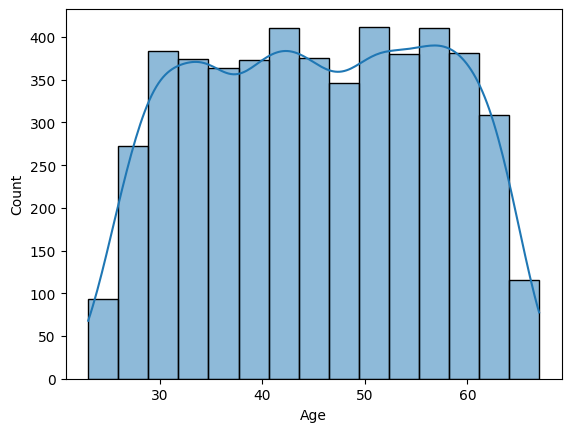

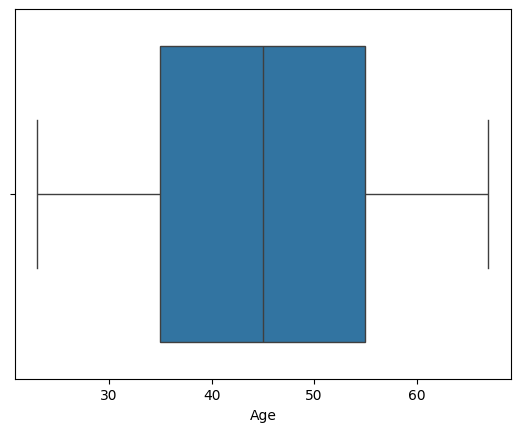

In [34]:
sns.histplot(data=Loan, x='Age',bins=15, kde = True)
plt.show()
sns.boxplot(data=Loan,x='Age')
plt.show()

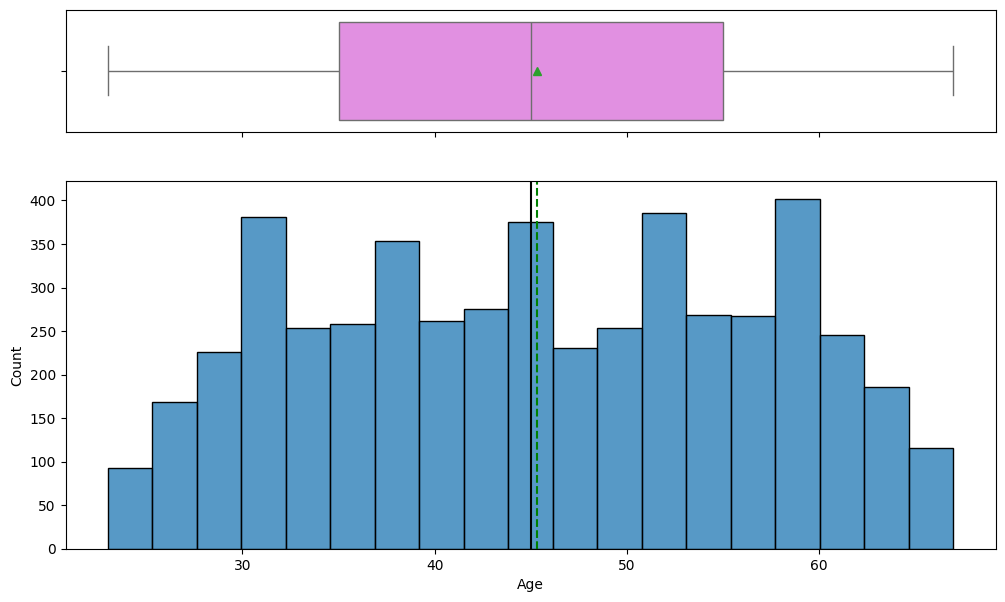

In [35]:
histogram_boxplot(Loan, 'Age')

* Age seems to be normally distributed.
* No outliers are observed.
* Majority of the Customers falls between the ages of 35 and 55.
* Median age is 45.

#### Observations on Experience

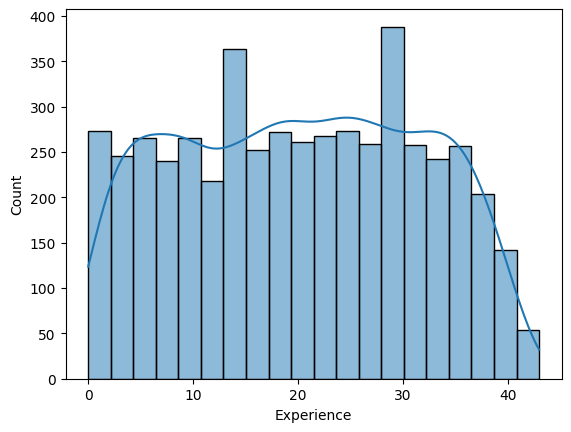

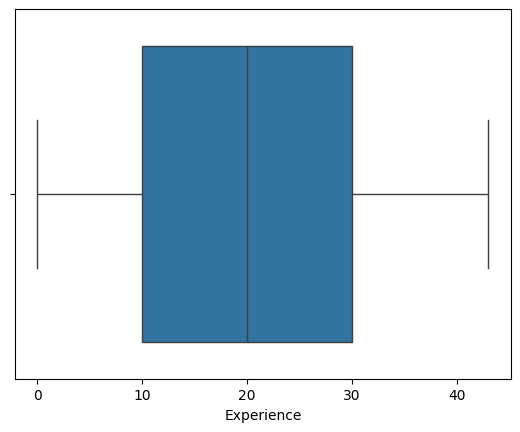

In [36]:
sns.histplot(data=Loan, x='Experience',bins=20, kde = True)
plt.show()
sns.boxplot(data=Loan,x='Experience')
plt.show()

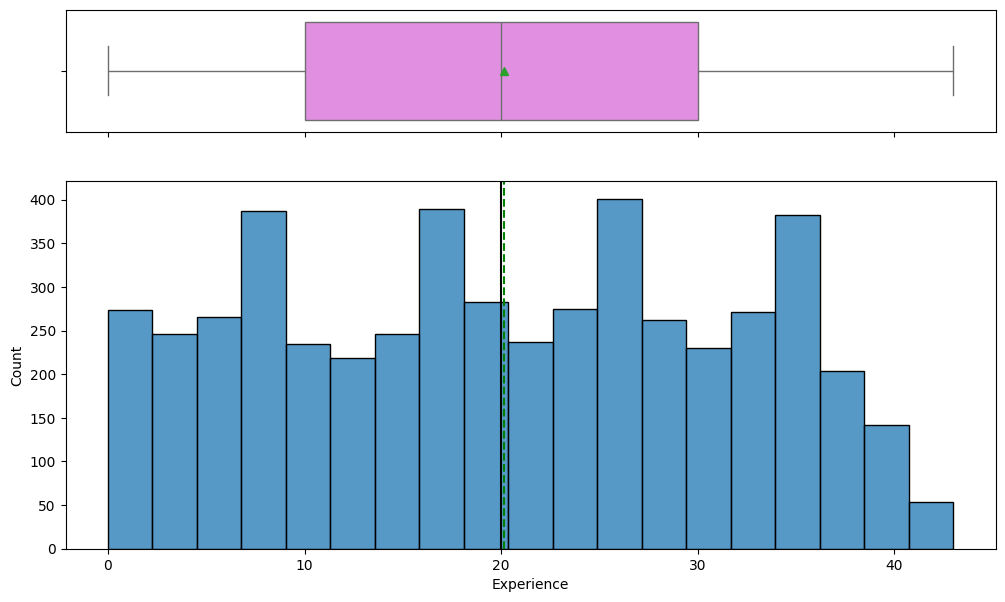

In [37]:
histogram_boxplot(Loan, 'Experience')

* Experience seems to be normally distributed
* Majority of  customers have Experience that seemed to be between 10 to 30 years
* Median experience is closer to 20

#### Observations on Income

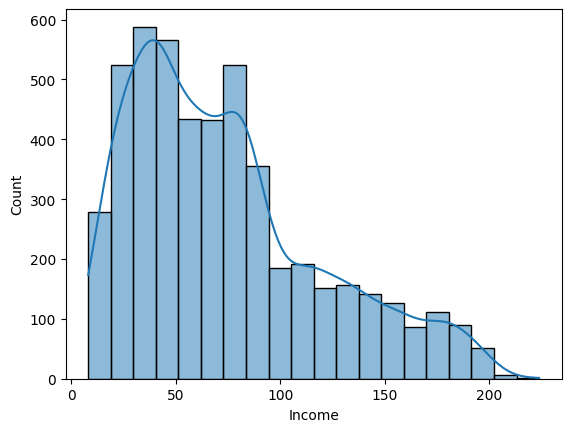

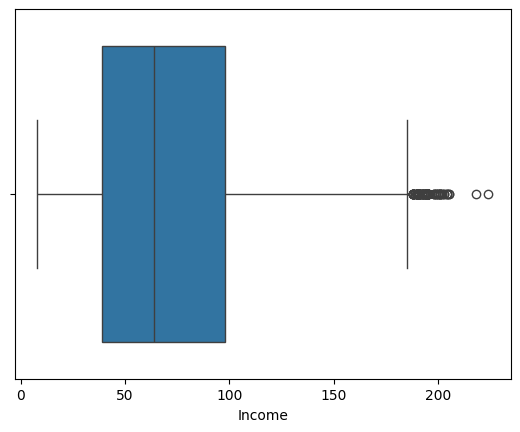

In [38]:
sns.histplot(data=Loan, x='Income',bins=20, kde = True)
plt.show()
sns.boxplot(data=Loan,x='Income')
plt.show()

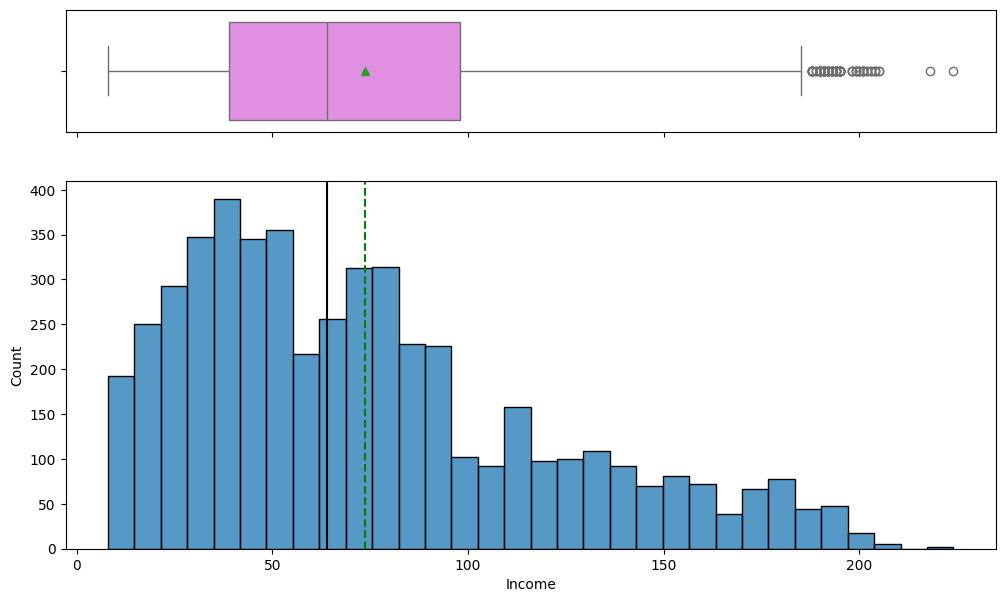

In [39]:
histogram_boxplot(Loan,'Income')

* Income seems to be Positively skewed or Right skewed.
* There seems to be a few outliers . Small percentage seens to have higher income.
* Most Customers seems to earn a moderate income, but a few seems to earn higher incomes.



#### Observations on CCAvg

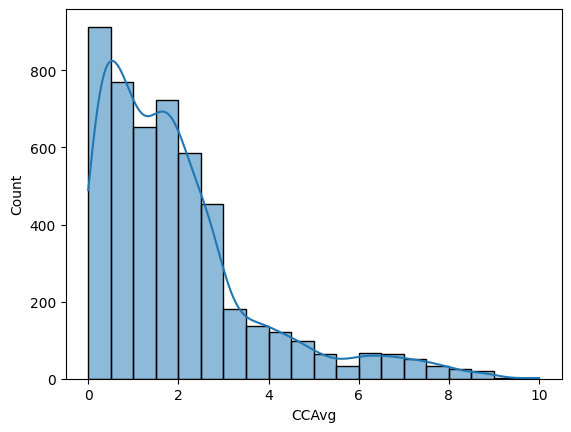

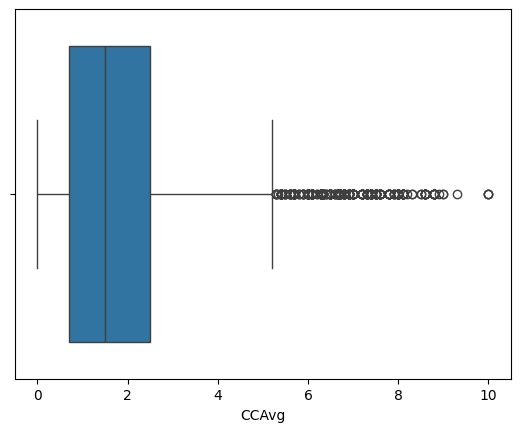

In [40]:
sns.histplot(data=Loan, x='CCAvg',bins=20, kde = True)
plt.show()
sns.boxplot(data=Loan,x='CCAvg')
plt.show()

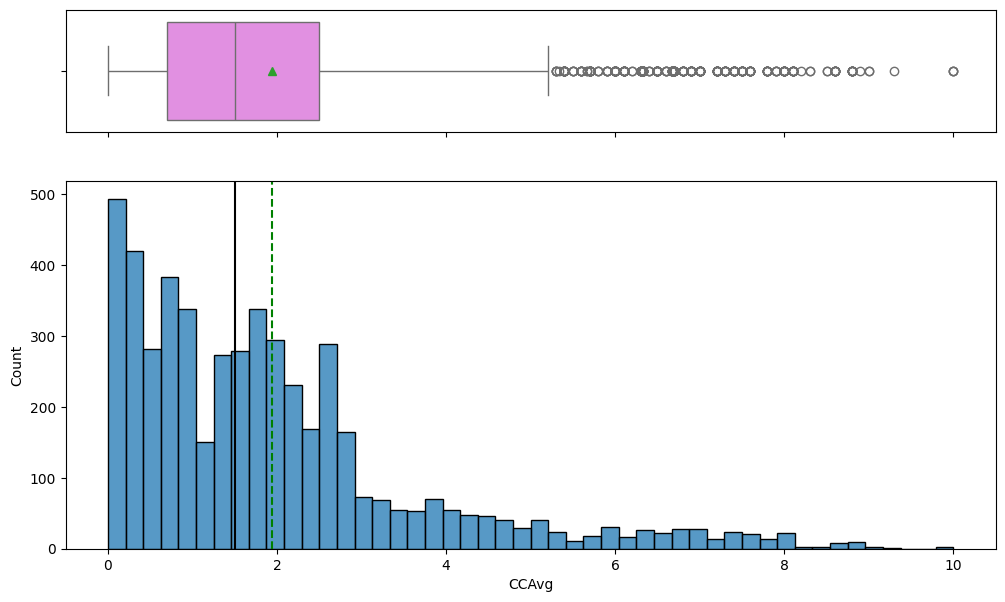

In [41]:
histogram_boxplot(Loan, 'CCAvg')

* CCAvg - Average Spending on Credit cards seems to be Positively skewed or Right skewed.
* There seems to be a few outliers . Small percentage of customers seemed to spend more than others.
* Most of the customers spent between 750 USD to 2500USD using their credit  card

#### Observations on Mortgage

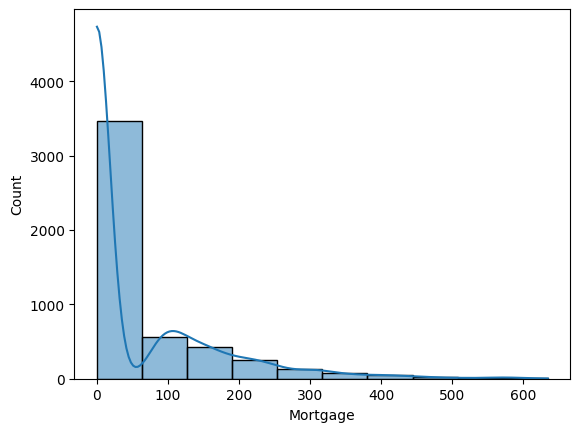

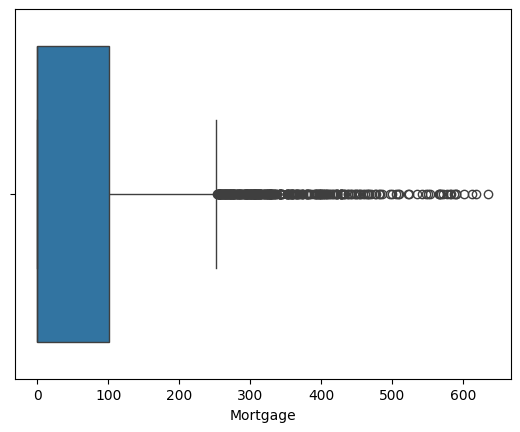

In [42]:
sns.histplot(data=Loan, x='Mortgage',bins=10, kde = True)
plt.show()
sns.boxplot(data=Loan,x='Mortgage')
plt.show()

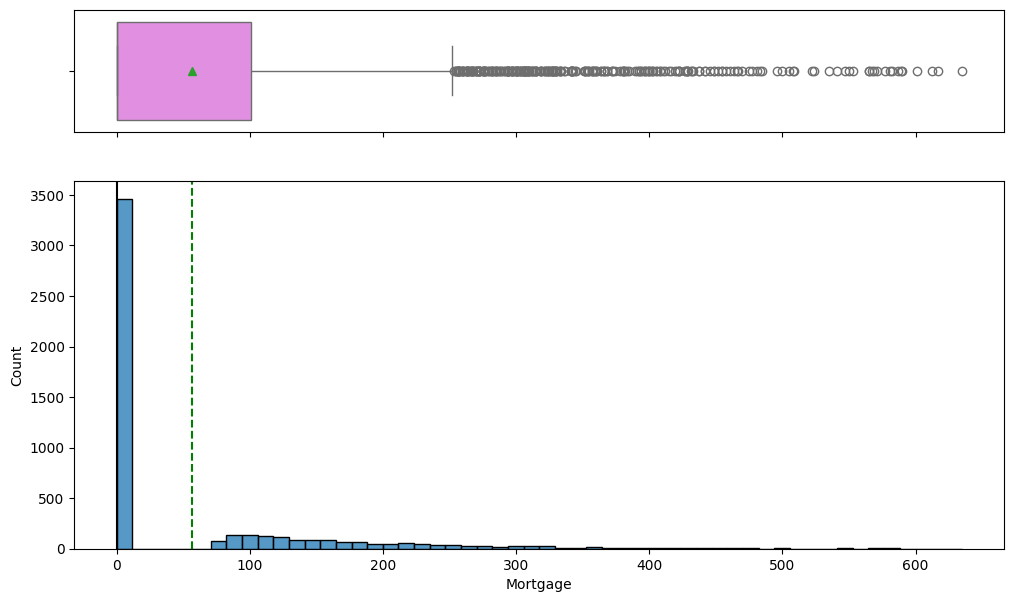

In [43]:
histogram_boxplot(Loan, "Mortgage")

* Mortgage is positively skewed or right skewed.
* There seems to be too many outliers
* Majority of the Mortgage seemed to be present after 75 percentile. 101K to 635K

#### Observations on Family

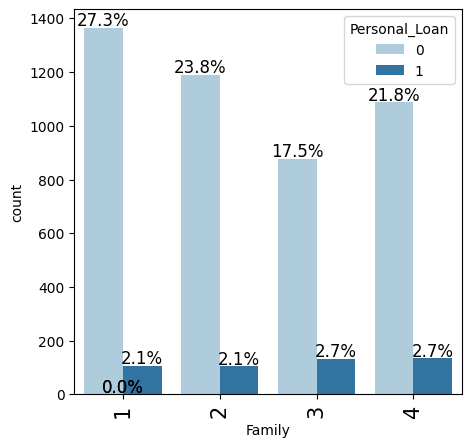

In [44]:
labeled_barplot(Loan, "Family", perc=True)

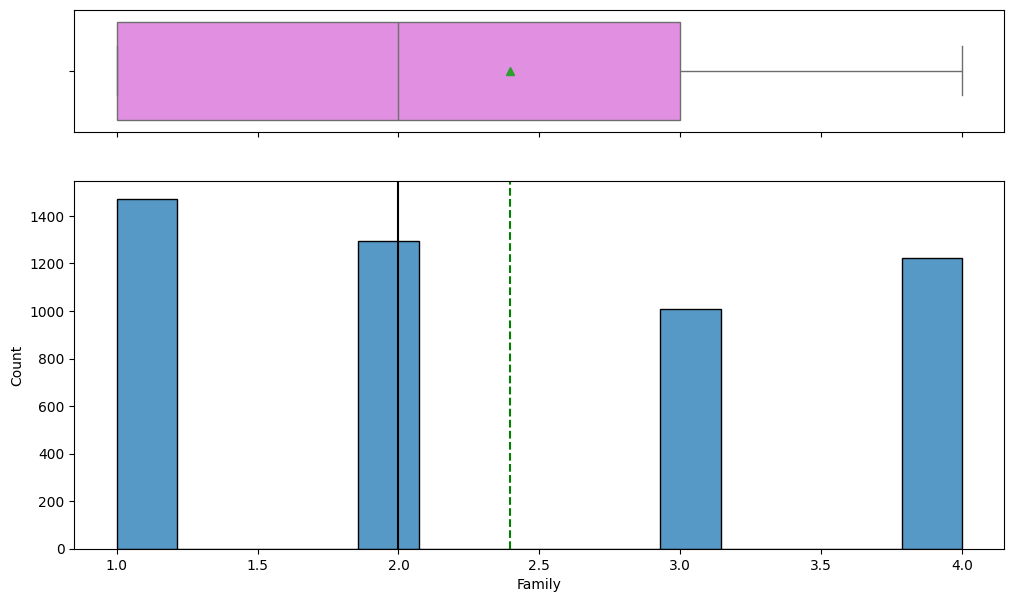

In [45]:
histogram_boxplot(Loan, "Family")



*   Right Skewed
*   Does not have outliers
*   Average number of members in a family is Between 2-3 members



#### Observations on Education

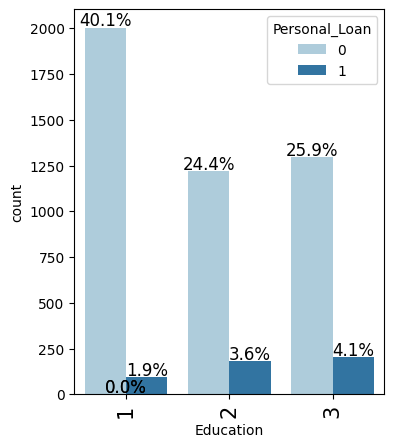

In [46]:
labeled_barplot(Loan,'Education', perc=True)

* 40% of applicants who have basic undergrad degree did not want to accept a loan
*  Hight acceptance was among Advanced Professional 4.1 %
* We can see that acceptance of loan was higher and postively proportional to education

#### Observations on Securities_Account

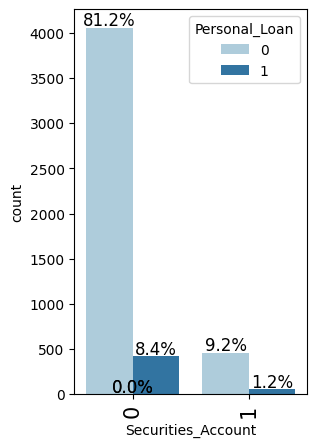

In [47]:
labeled_barplot(Loan,'Securities_Account',perc= True)

* Customers with a Securities Account  seemed to have lesser percentage 1.2 % of Loan acceptance
* Customers without a securities accoout seemed have 8.4% probability of purchasing the loan .

#### Observations on CD_Account

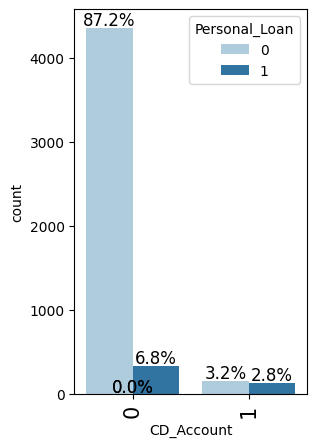

In [48]:
labeled_barplot(Loan,'CD_Account',perc= True)

* Customers with Cd account seems to have lesser probability of 2.8% loan acceptance

#### Observations on Online

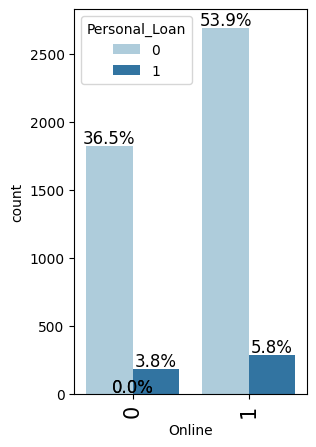

In [49]:
labeled_barplot(Loan, 'Online', perc= True)

* Customers having an online seemed to have a higher probability of 5.8% of Loan acceptance

#### Observation on CreditCard

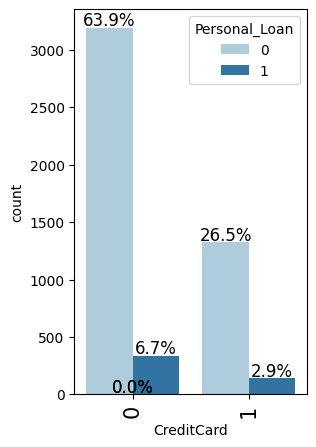

In [50]:
labeled_barplot(Loan, 'CreditCard', perc= True)   ## Complete the code to create labeled_barplot for CreditCard

* Customers without a Creditcard seemed to have higher loan acceptance rate of 6.7%

* Customer with a Credit card had a lower accptance rate of 2.9%

#### Observation on ZIPCode

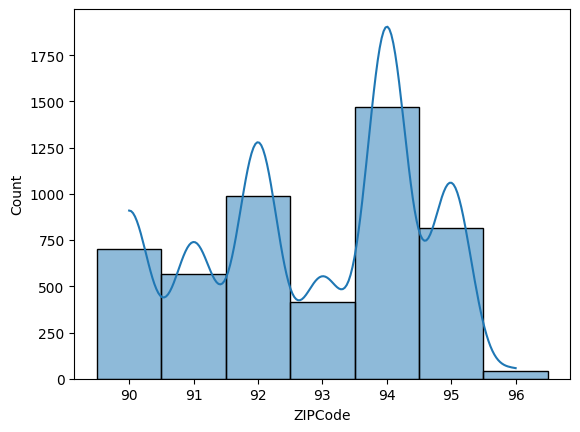

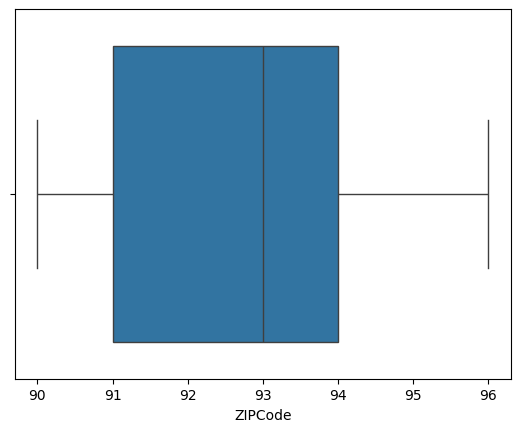

In [51]:
sns.histplot(data=Loan, x='ZIPCode',bins=20, kde = True)
plt.show()
sns.boxplot(data=Loan,x='ZIPCode')
plt.show()

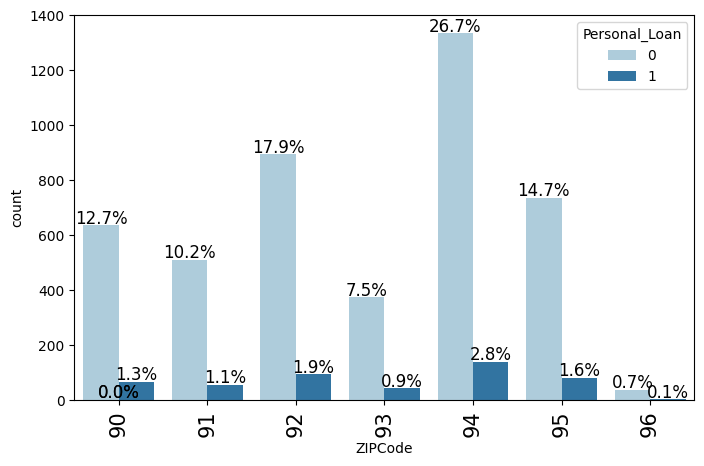

In [52]:
labeled_barplot(Loan, 'ZIPCode', perc= True)   ## Complete the code to create labeled_barplot for ZIPCode

* ZIPCode is left skewed or negatively skewed
* Majority of the customers seems to live in Zipcode starting in 94.
* Lowest number of customer seem to live in zipcode starting in 96

#Bivariate Analysis

#Following questions will be answered after analysis.

3)What are the attributes that have a strong correlation with the target attribute (personal loan)?

4)How does a customer's interest in purchasing a loan vary with their age?

5)How does a customer's interest in purchasing a loan vary with their education?


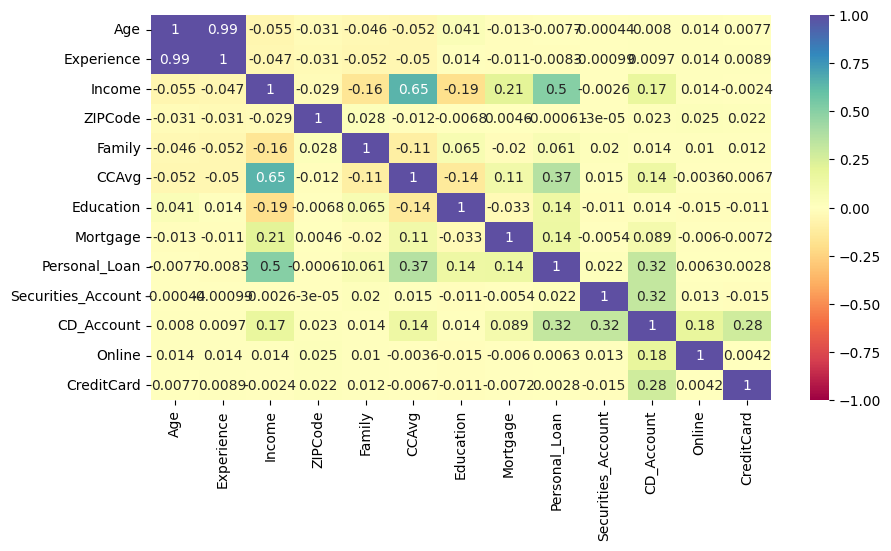

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(Loan.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

3)What are the attributes that have a strong correlation with the target attribute (personal loan)?

*  Personal loan is highly correlated with Income. (0.5)
then Personal loan is highly correlated with CCAvg spend with Credit Cards
then Personal loan is also correlated with having a Cd account



* Heatmap does not showcase correlation for categorical data . Let us remove them and study Numerical data with target variable Personal Loan

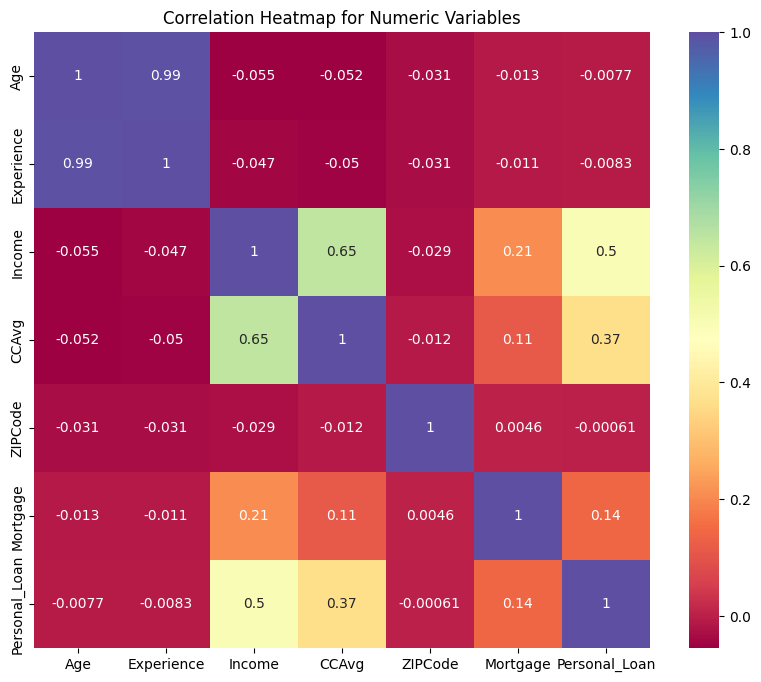

In [54]:
numeric_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'ZIPCode', 'Mortgage','Personal_Loan']
numeric_data = Loan[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', square=True)
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

* Experience and Age seems to be highly correlated
* CCAvg and Income seems to be highly correlated

3) What are the attributes that have a strong correlation with the target attribute (personal loan)?

*  Personal loan is highly correlated with Income.(0.5)
then Personal loan is highly correlated with CCAvg spend with Credit Cards
then Personal loan is also correlated with having a Cd account

4) How does a customer's interest in purchasing a loan vary with their age?

* Age seems to have very low impact on purchasing a Personal loan

5) How does a customer's interest in purchasing a loan vary with their education?
From the previous heatmap, we can see 0.14 as the correlation. So education also seems have very low impact on Personal Loan


In [55]:
def stacked_barplot(Loan, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    Loan: dataframe
    predictor: independent variable
    target: target variable
    """
    count = Loan[predictor].nunique()
    sorter = Loan[target].value_counts().index[-1]
    tab1 = pd.crosstab(Loan[predictor], Loan[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(Loan[predictor], Loan[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation check

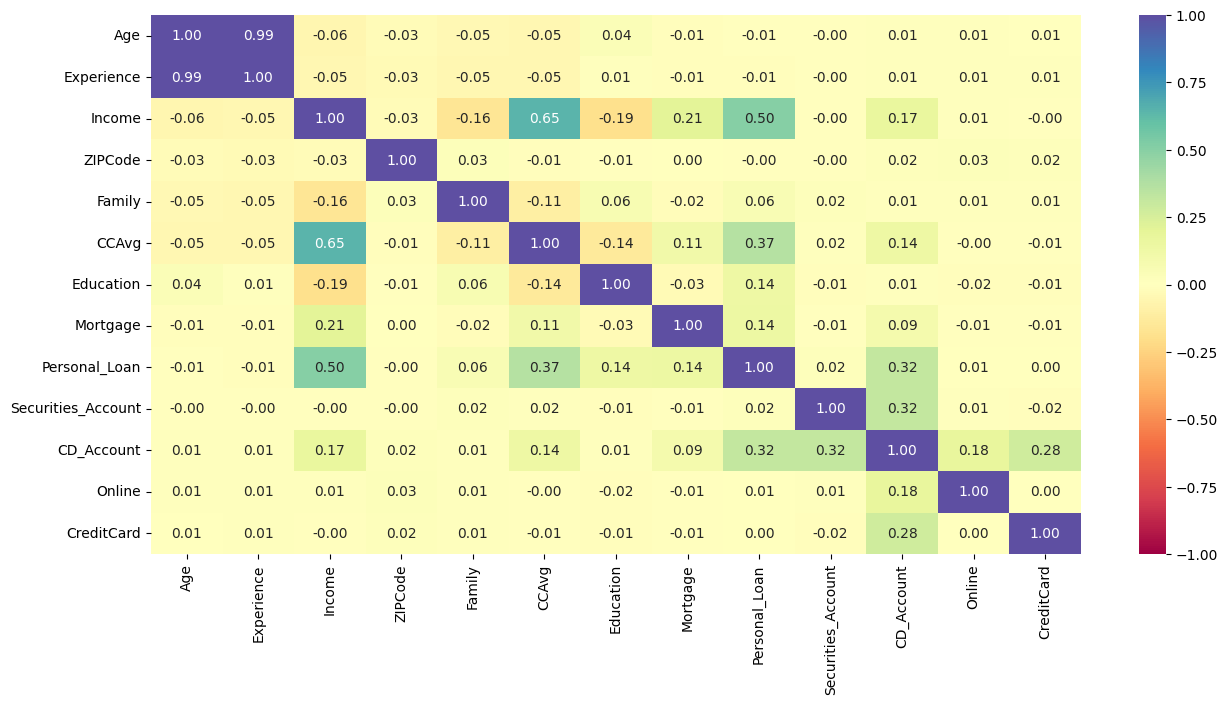

In [56]:
plt.figure(figsize=(15, 7))
sns.heatmap(Loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Personal_Loan vs AGE

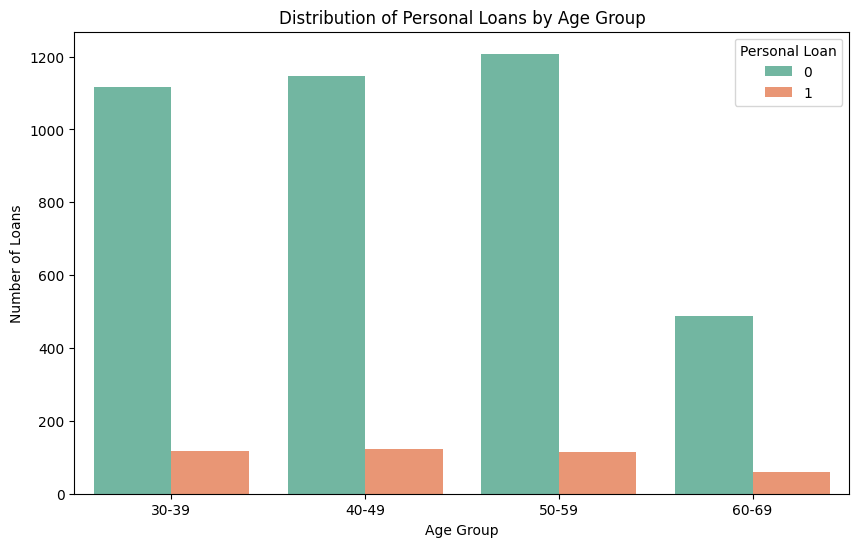

In [57]:
# Creating age categories
bins = [30, 40, 50, 60, 70]  # Define age boundaries here
labels = ["30-39", "40-49", "50-59", "60-69"]  # Labels for each age group
Loan["Age_Group"] = pd.cut(Loan["Age"], bins=bins, labels=labels)

# Creating the stacked bar plot
def stacked_barplot(data, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=x_col, hue=y_col, palette="Set2")
    plt.title("Distribution of Personal Loans by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Loans")
    plt.legend(title="Personal Loan", loc="upper right")
    plt.show()

# Call the function with the Loan data
stacked_barplot(Loan, "Age_Group", "Personal_Loan")

* Customers between 50 to 59 seems to have rate of **not** purchasing a loan

In [58]:
Loan.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_Group
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0,NaN
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0,40-49
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0,30-39
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0,30-39
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1,30-39


In [59]:
# removing age group as it is no longer needed for analysis
Loan.drop("Age_Group", axis=1, inplace=True)

In [60]:
#checking the Data frame
Loan.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


#### Personal_Loan vs Family

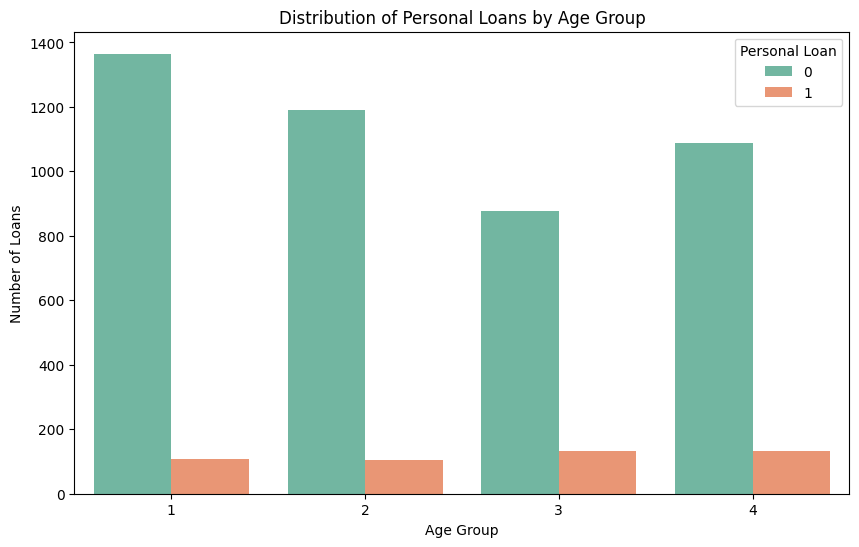

In [61]:
stacked_barplot(Loan, "Family", "Personal_Loan")

* Family number did not seem to have too much effect on personal loan

#### Personal_Loan vs Securities_Account

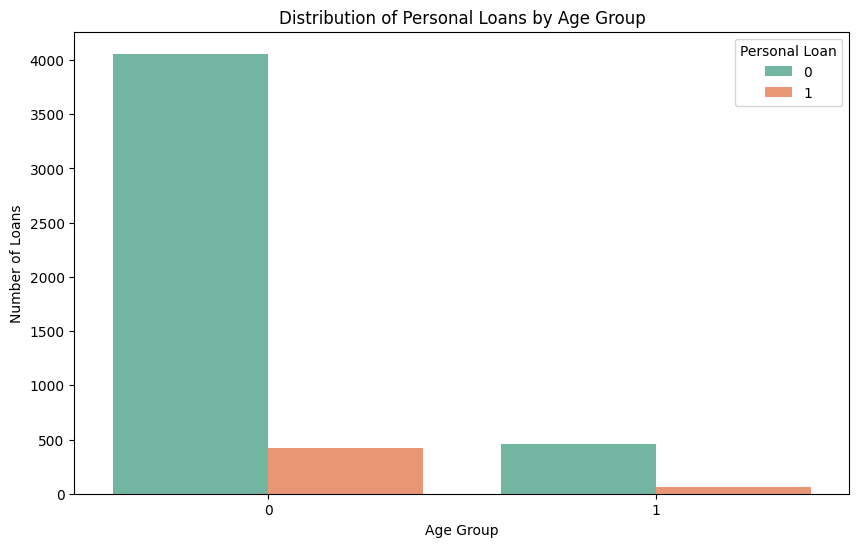

In [62]:
stacked_barplot(Loan, "Securities_Account", "Personal_Loan")

* Customers with Securities account seems to have lesser acceptance in purchasing a Loan

#### Personal_Loan vs CD_Account

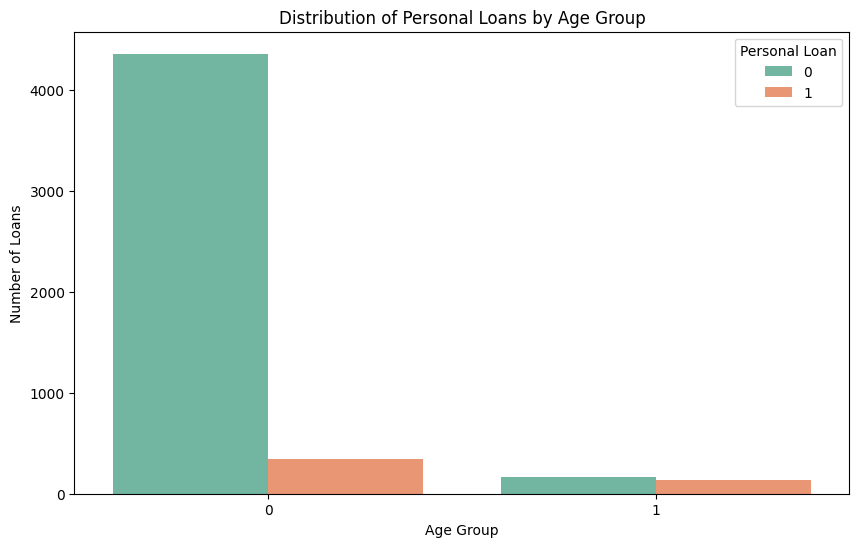

In [63]:
stacked_barplot(Loan, "CD_Account", "Personal_Loan")

*Not having a CD account had very low impact on purchasing the loan

#### Personal_Loan vs Online

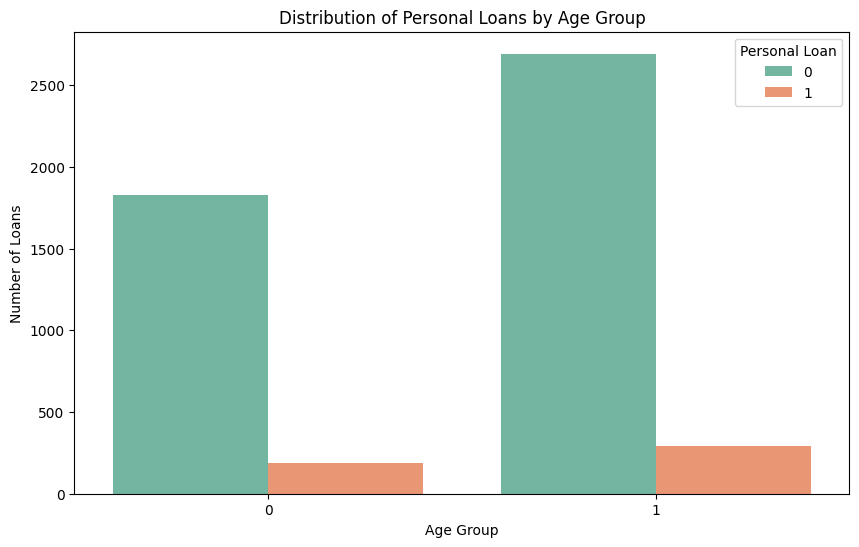

In [64]:
stacked_barplot(Loan, "Online", "Personal_Loan")

* Customer having an online account had a lower chances of purchasing a loan

#### Personal_Loan vs CreditCard

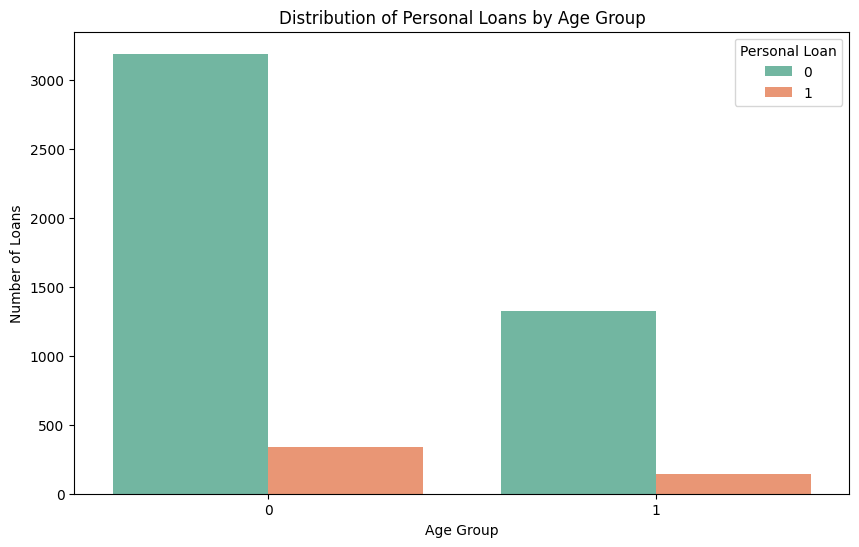

In [65]:
stacked_barplot(Loan, "CreditCard", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CreditCard

* Customer having a credit card had a lower chances of purchasing a loan

#### Personal_Loan vs ZIPCode

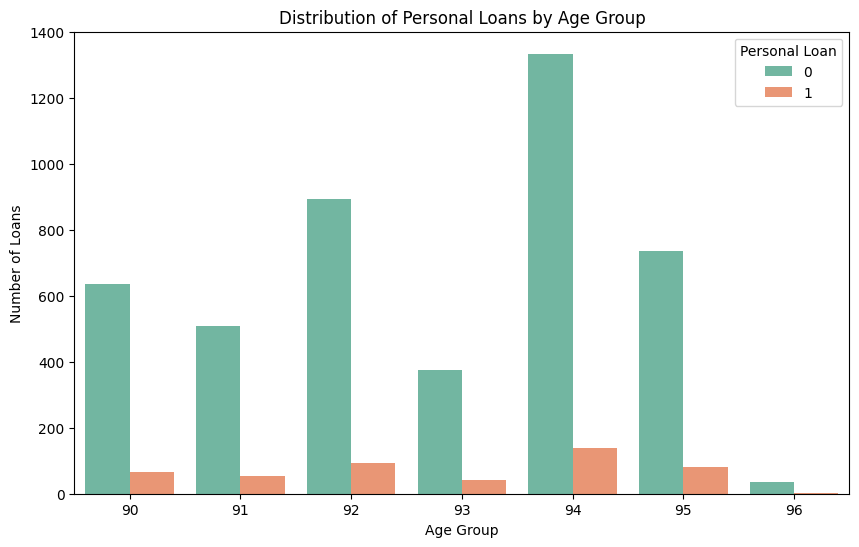

In [66]:
stacked_barplot(Loan, "ZIPCode", "Personal_Loan")

* Customers living in  zipcode starting with 94 seems to have a higher acceptance rate to purchase a loan

#### Let's check how a customer's interest in purchasing a loan varies with their education

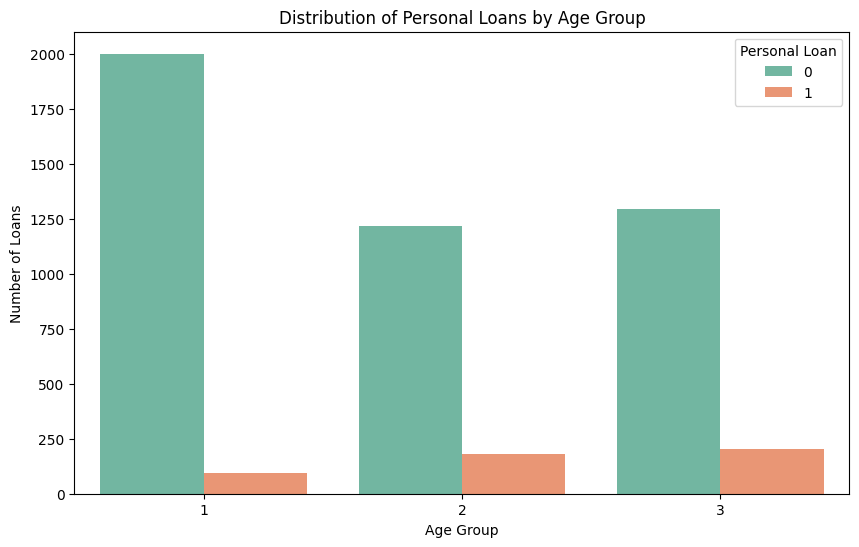

In [67]:
stacked_barplot(Loan, "Education", "Personal_Loan")

* Customers with basic undergrad degree had lower chance of purchasing a loan

In [68]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(Loan, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = Loan[target].unique()

    axs[0, 0].set_title(f"Distribution of {predictor} for {target}={target_uniq[0]}")
    sns.histplot(
        data=Loan[Loan[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        hue=target,
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(f"Distribution of {predictor} for {target}={target_uniq[1]}")
    sns.histplot(
        data=Loan[Loan[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=Loan, x=target, y=predictor, ax=axs[1, 0], hue=target, palette="gist_rainbow", legend=False)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=Loan,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        hue=target,
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Personal Loan vs Experience

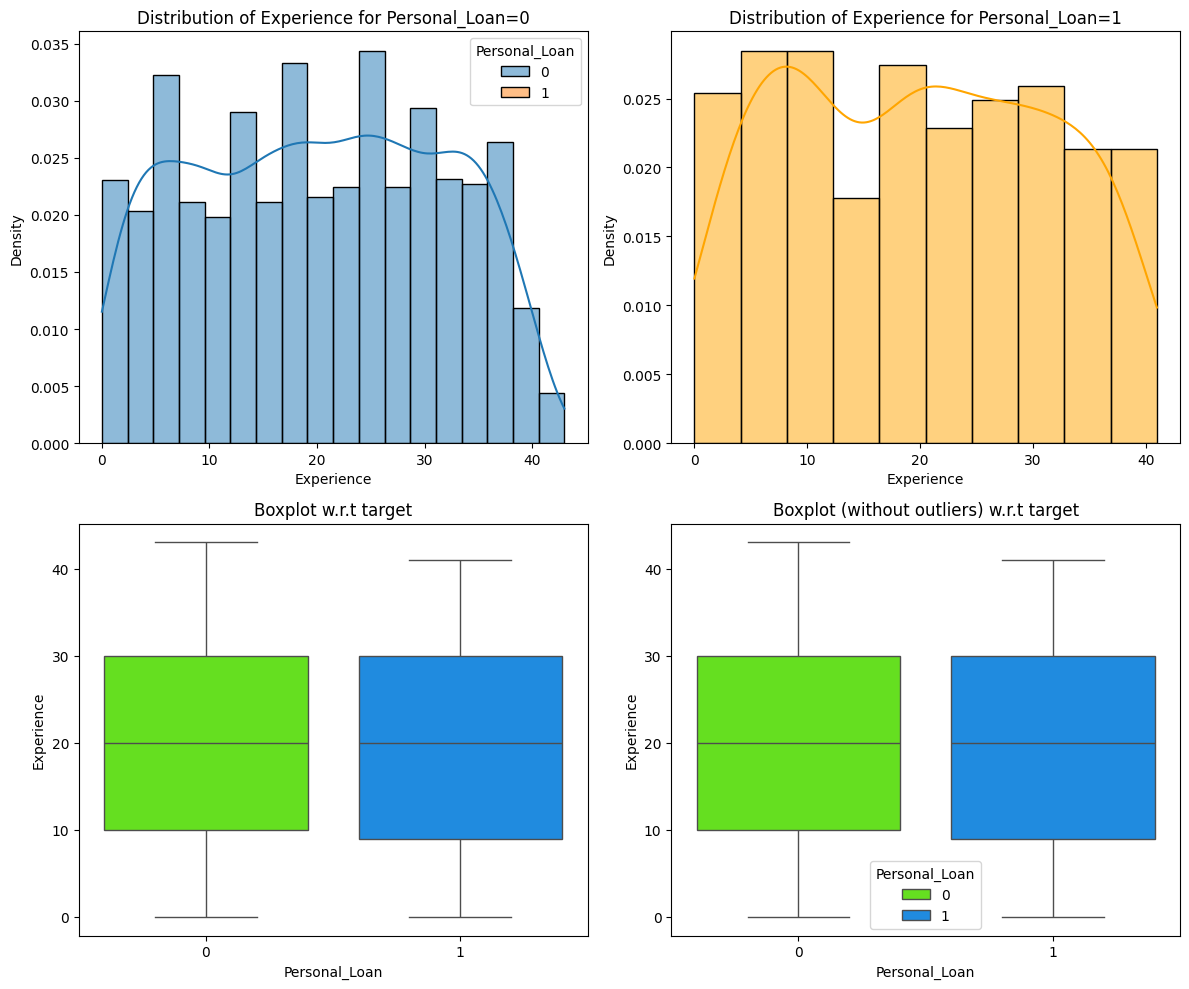

In [69]:
distribution_plot_wrt_target(Loan, 'Experience','Personal_Loan')

#### Personal Loan vs Income

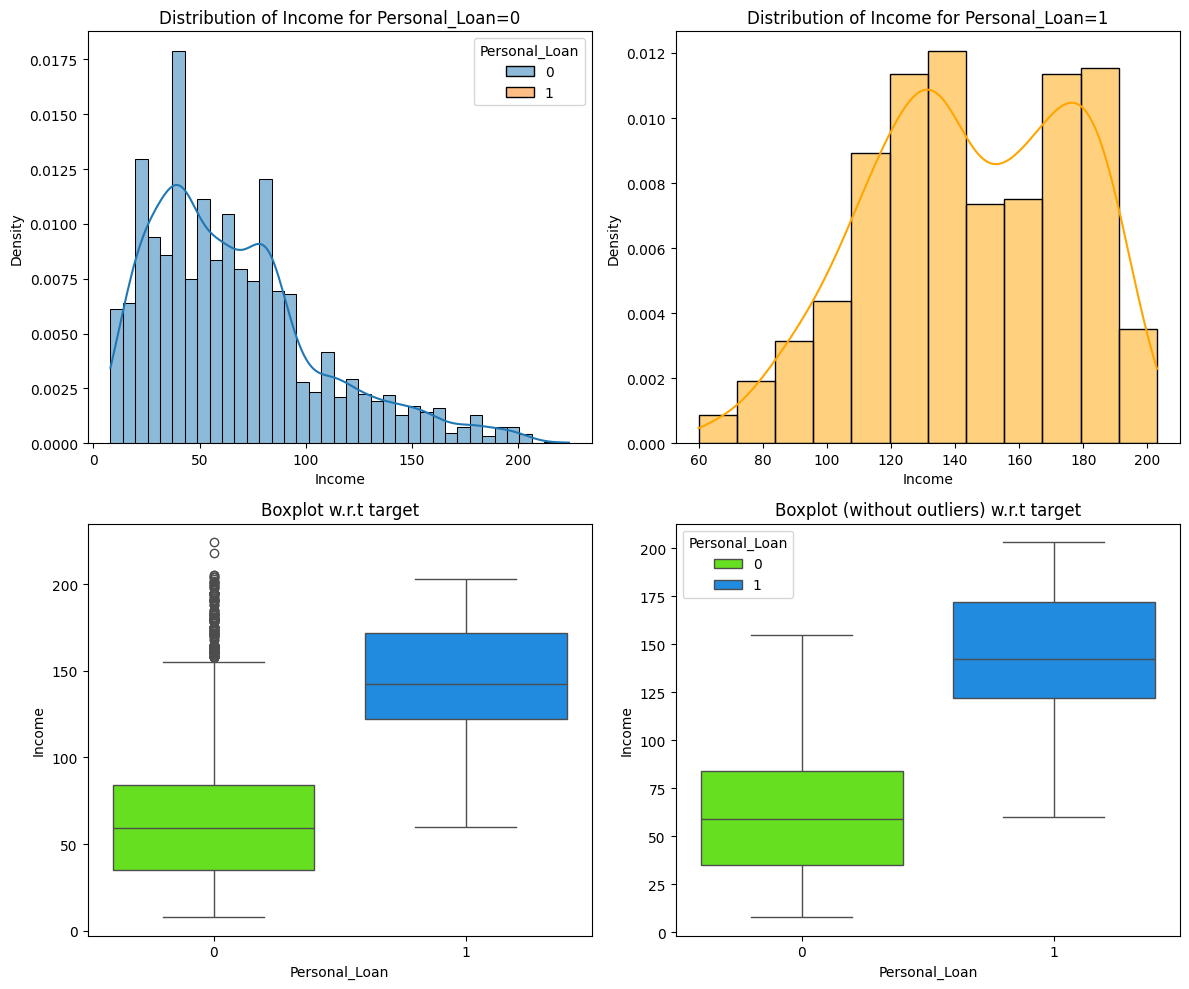

In [70]:
distribution_plot_wrt_target(Loan, 'Income','Personal_Loan')

#### Personal Loan vs CCAvg

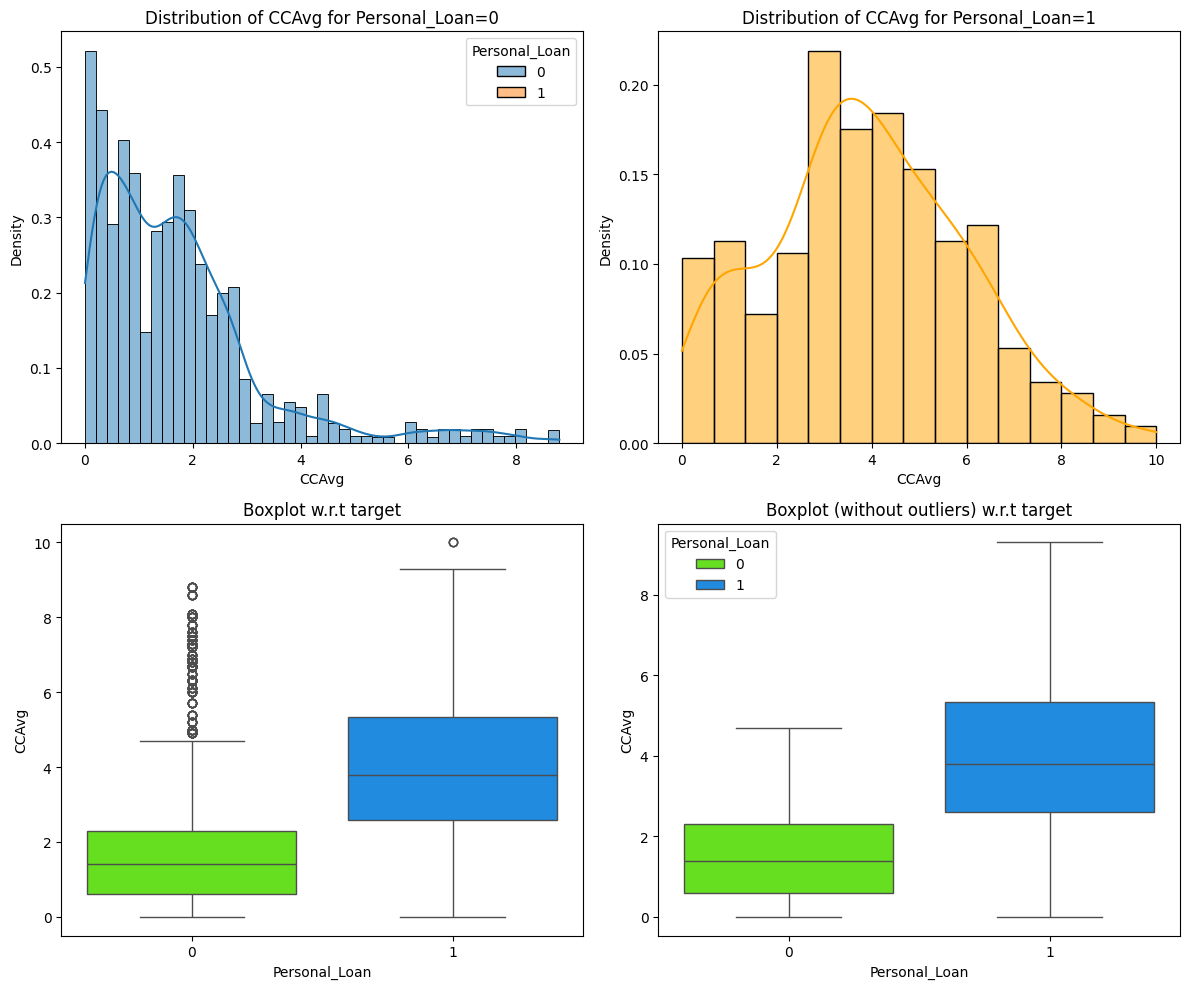

In [71]:
distribution_plot_wrt_target(Loan, 'CCAvg','Personal_Loan') ## Complete the code to plot stacked barplot for Personal Loan and CCAvg

# Data Preprocessing (contd.)

### Outlier Detection

In [72]:
Q1 = Loan.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = Loan.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR


# Print the results for each column
for col in Loan.select_dtypes(include=["float64", "int64"]).columns:
    print(f"Column '{col}':")
    print(f"  IQR: {IQR[col]:.2f}")
    print(f"  Lower bound: {lower[col]:.2f}")
    print(f"  Upper bound: {upper[col]:.2f}")
    print()

Column 'Age':
  IQR: 20.00
  Lower bound: 5.00
  Upper bound: 85.00

Column 'Experience':
  IQR: 20.00
  Lower bound: -20.00
  Upper bound: 60.00

Column 'Income':
  IQR: 59.00
  Lower bound: -49.50
  Upper bound: 186.50

Column 'Family':
  IQR: 2.00
  Lower bound: -2.00
  Upper bound: 6.00

Column 'CCAvg':
  IQR: 1.80
  Lower bound: -2.00
  Upper bound: 5.20

Column 'Mortgage':
  IQR: 101.00
  Lower bound: -151.50
  Upper bound: 252.50



In [73]:
(
    (Loan.select_dtypes(include=["float64", "int64"]) < lower)
    | (Loan.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(Loan) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

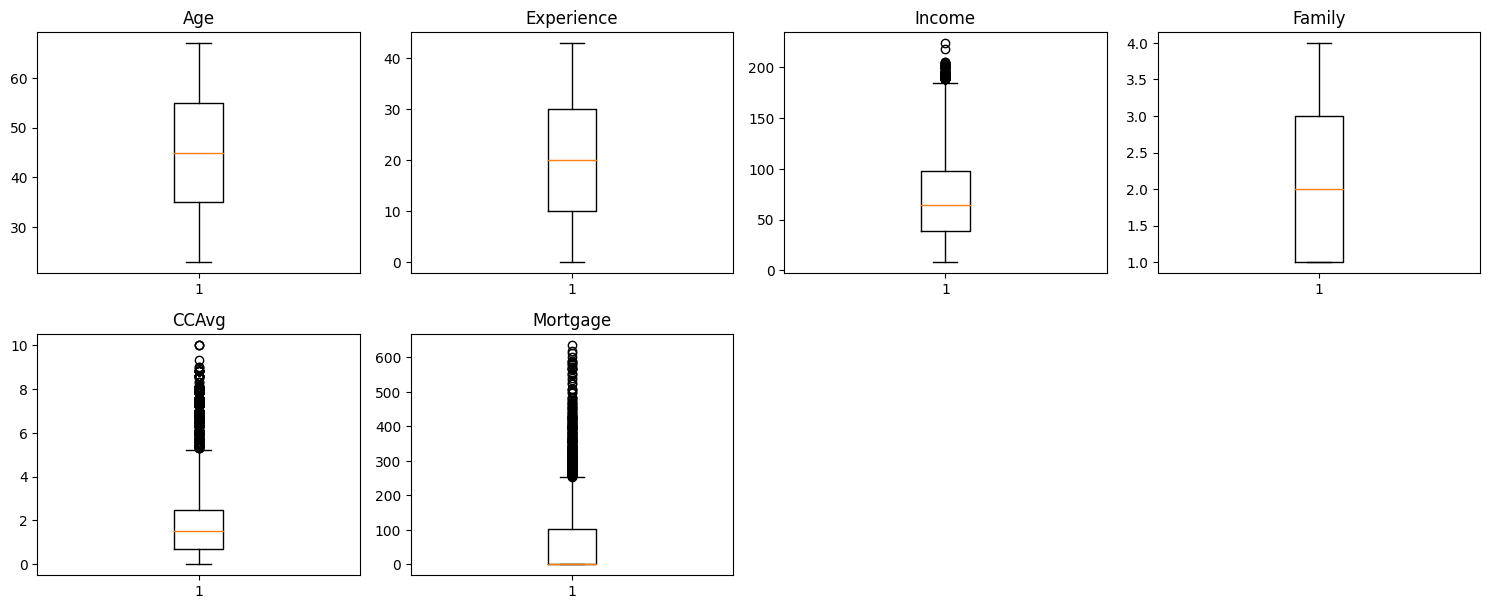

In [74]:
# outlier detection using boxplot
numeric_columns = Loan.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(Loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Data Preprocessing


* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Data Preparation for Modeling

In [75]:
# dropping Experience as it is perfectly correlated with Age
X = Loan.drop(["Personal_Loan", "Experience"], axis=1)
Y = Loan["Personal_Loan"]
# One-hot encode categorical columns ('ZIPCode' and 'Education')
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [76]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around 90.6% of observations belongs to class 0 (Not purchased loan) and 9.45% observations belongs to class 1 (purchased Loan), and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer  will not accept loan  but in reality, the Customer will accept (FN) -False Negative
- Predicting a customer will accept loan but in reality, the customer will not accept loan (FP) - False Positive

**Which case is more important?**

False Negative (Predicting Approval, But customer does not purchase Loan ):
If the Bank predicts that a loan applicant will be creditworthy (i.e., offers the loan), but in reality, the customer does not purchase  the loan, the consequences are significant.
The Bank faces financial losses due to not enough lending  and it may need to allocate resources for additional marketing .
Additionally, there’s reputational risk, as customers may lose trust in the institution’s lending decisions.


False Positive (Predicting Rejection, But Applicant Repays):
Conversely, if the Bank predicts that an applicant is not going to purchase loan  (i.e., rejects the purchase of loan), but the customer would have actually accepted the purchase of  the loan successfully, there are different implications.
The Bank incurs an opportunity cost—missing out on interest income and potential customer loyalty.
While the cost of evaluating the application (inspection) is relatively low, the lost revenue and missed business opportunities can accumulate over time.

SO it is more important explore missed opportunities - which is to consider False Positives

**How to reduce the losses?**

The Bank would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [78]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [79]:
# Create a label encoder
#label_encoder = LabelEncoder()

# Encode the 'Age_Group' column
#Loan["Age_Group_Encoded"] = label_encoder.fit_transform(Loan["Age_Group"])

# Separate features and target
#X = Loan.drop(columns=["Personal_Loan"])  # Assuming 'Personal_Loan' is the target column
#y = Loan["Personal_Loan"]
# Initialize the decision tree classifier
#model = DecisionTreeClassifier(criterion="gini", random_state=1)
#model.fit(X_train, y_train)

In [80]:
#Initialize the decision tree classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

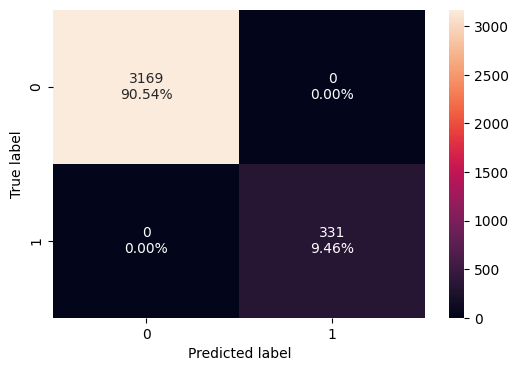

In [81]:
confusion_matrix_sklearn(model, X_train, y_train)

In [82]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Visualizing the Decision Tree

In [83]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


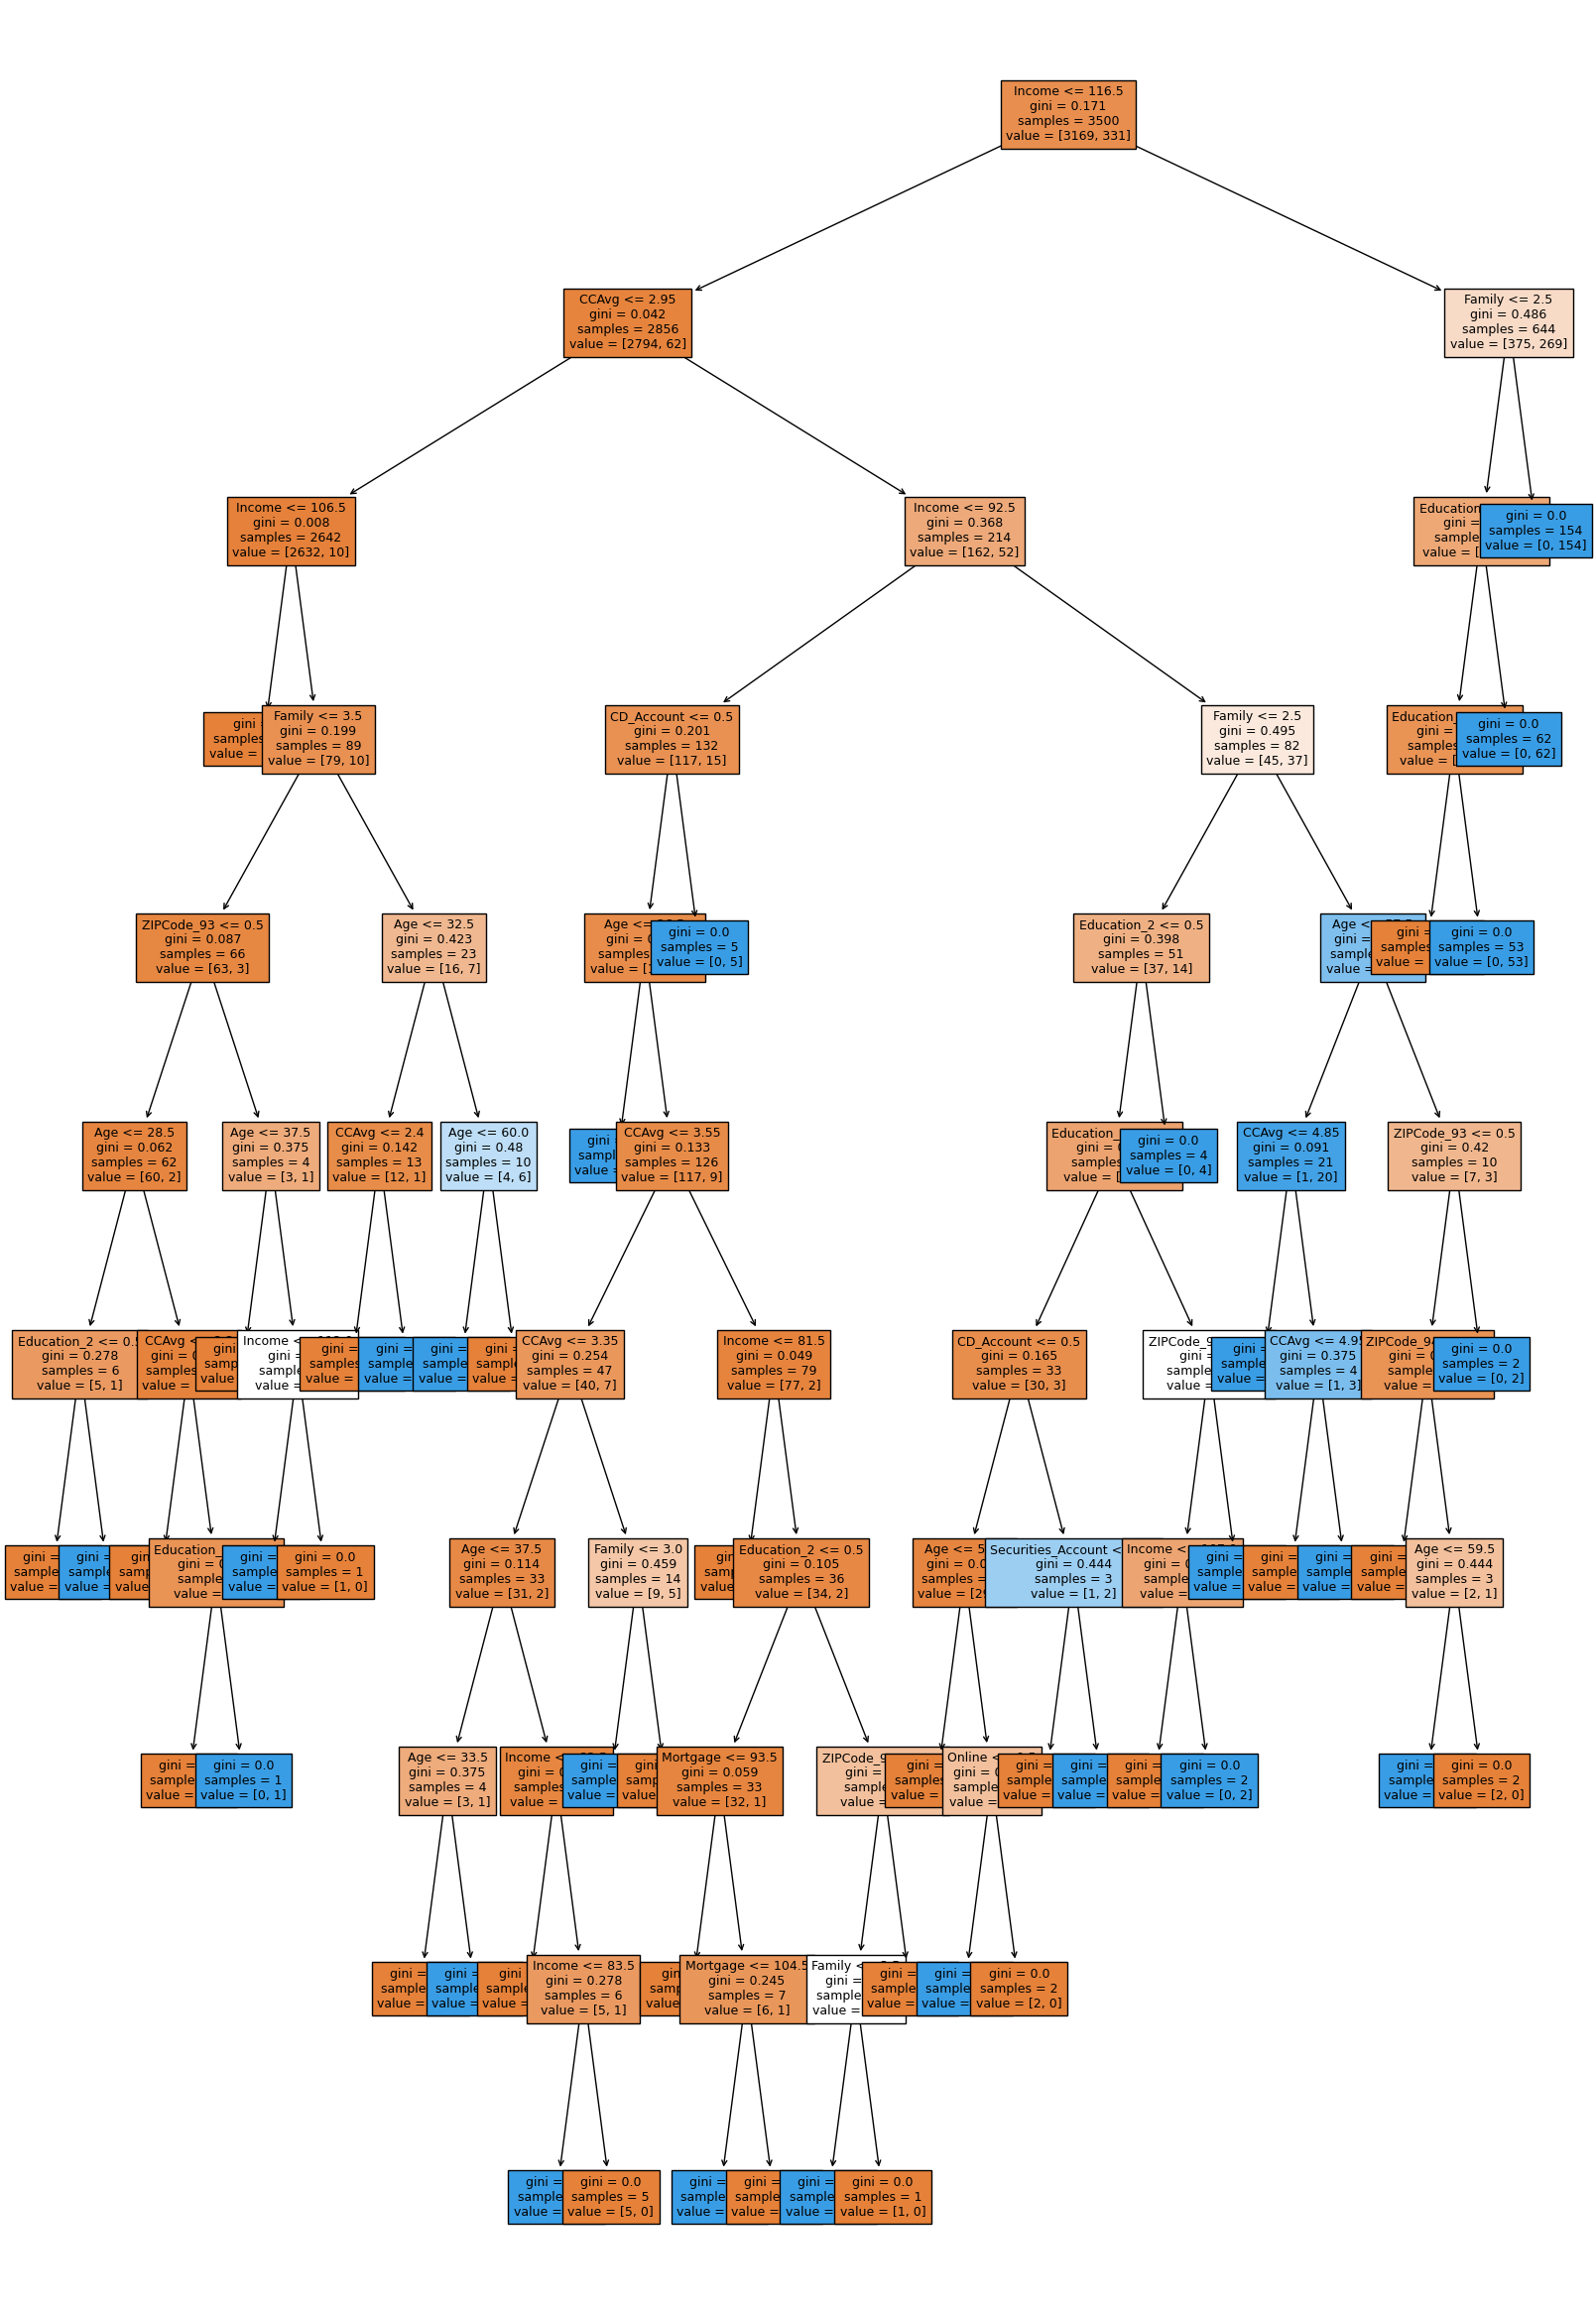

In [84]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [85]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [86]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


#####Observations:
Income (0.308):
Income is the most important feature according to Gini importance.
Higher income levels are associated with a higher likelihood of the target outcome (e.g., accepting a personal loan).


Family (0.259):
Family size (or perhaps a proxy for household stability) is the second most important feature.
Larger families may have different financial needs or behaviors.


Education_2 (0.166) and Education_3 (0.147):
These are dummy variables representing different levels of education.
Education level also plays a significant role in predicting the target outcome.


CCAvg (0.049):
Average credit card spending per month has a moderate impact.
Higher credit card usage might indicate greater financial activity.


Age (0.033):
Age contributes, but it’s less influential compared to other features.
Younger or older individuals may exhibit different loan acceptance patterns.


CD_Account (0.017):
Having a certificate of deposit (CD) account is relevant but not highly significant.

ZIP CODE:
ZIPCode_94 (0.007) and ZIPCode_93 (0.005):
These are likely ZIP code-related dummy variables.
Certain ZIP codes might correlate with loan acceptance.
Mortgage (0.003), Online (0.002), and Securities_Account (0.002):
These features have minimal impact on the model.
Mortgage amount, online banking usage, and securities account ownership play smaller roles.
ZIPCode_91 (0.001), ZIPCode_92 (0.000), ZIPCode_95 (0.000), and ZIPCode_96 (0.000):
These ZIP code categories have negligible importance.
They likely don’t significantly affect loan acceptance.

CreditCard (0.000):
Credit card ownership doesn’t contribute much to the model.

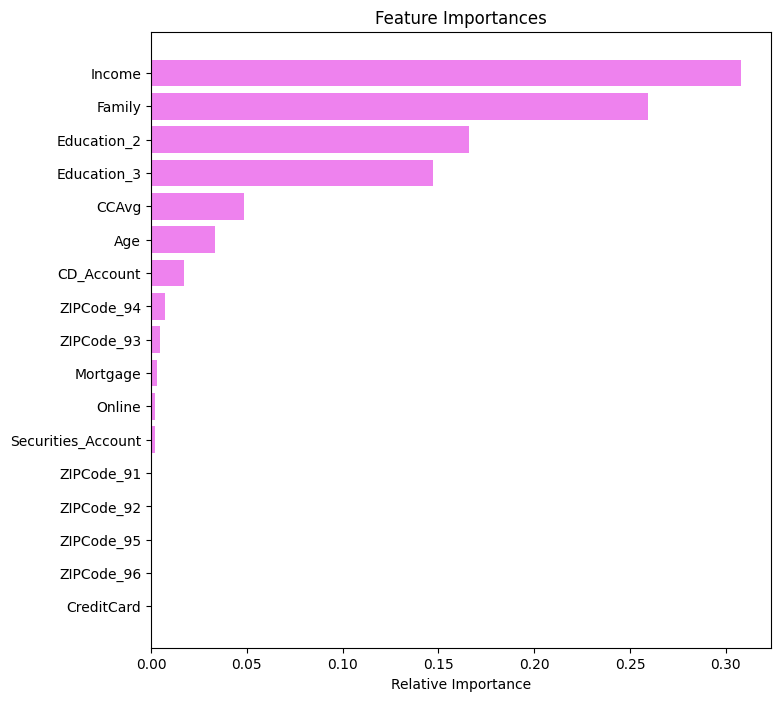

In [87]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Checking model performance on test data

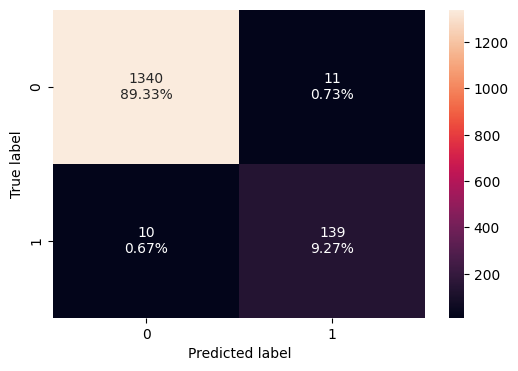

In [88]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [89]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


### Model Performance Improvement

Evaluating all Decision tree models

### Decision Tree (default)

In [90]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

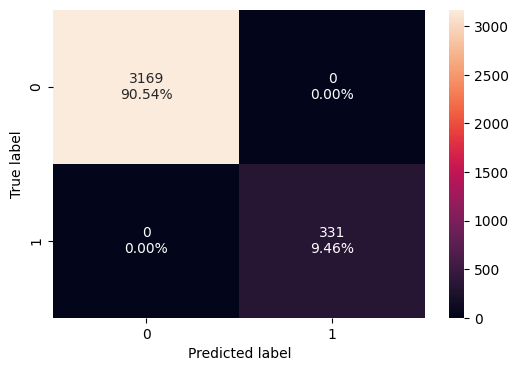

In [91]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [92]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


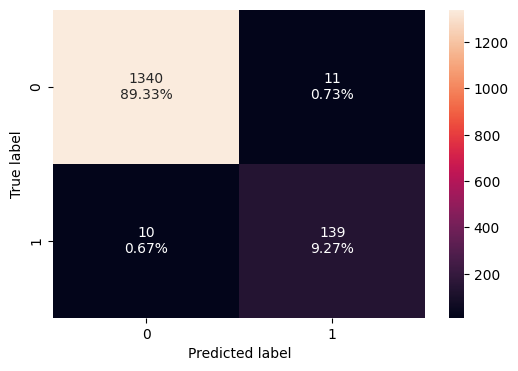

In [93]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [94]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [95]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

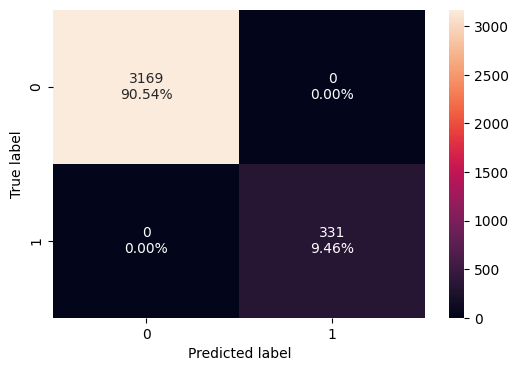

In [96]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [97]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

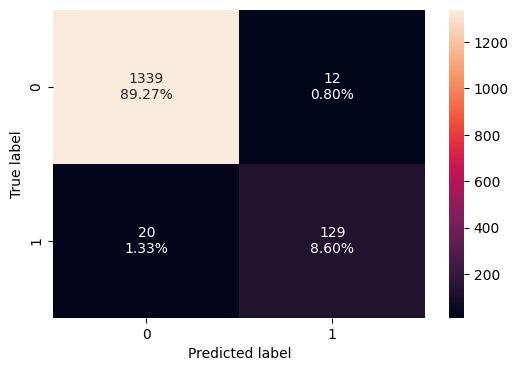

In [98]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [99]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.865772,0.914894,0.889655


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [100]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [101]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

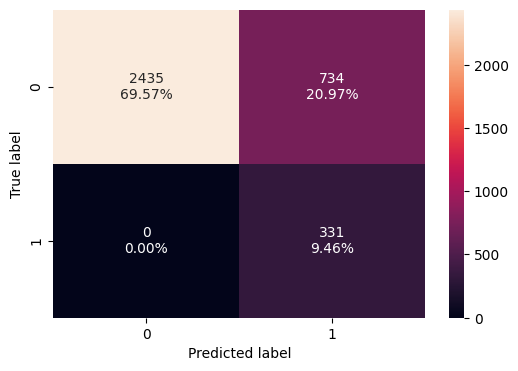

In [102]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [103]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


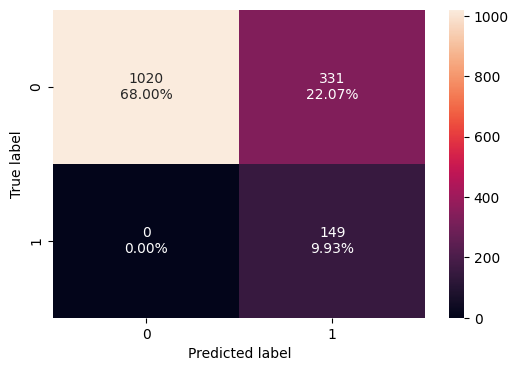

In [104]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [105]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768




* The model is giving a generalized result now since the recall scores on both the train and test data are coming to perfect 1 which shows that the model is able to generalize well on unseen data.

In [106]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

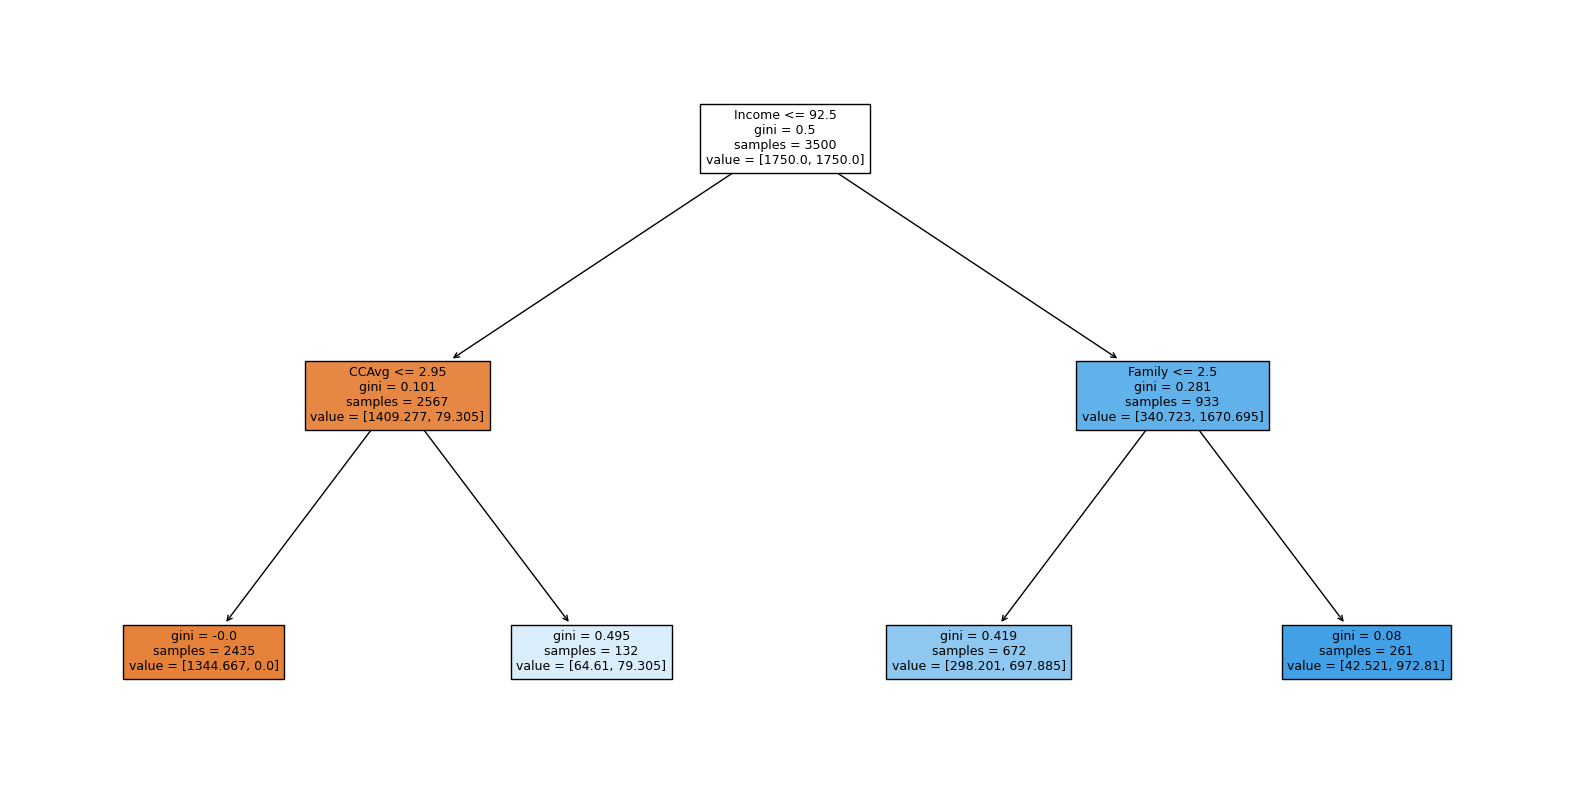

In [107]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [108]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the Income is less than or equal to 92,500 USD and the CCAvg is less than or equal to 2.95,  then the Customer is most likely to not accept loan

* If the Income is less than or equal to 92,500 USD and the CCAvg is greater to 2.95,  then the Customer is most likely to accept loan

* If the Income is greater than  92,500 USD and the number of family member is less than or equal to 2 or 3,  then the Customer is most likey to accept loan

* If the Income is greater than 92,500 USD , the CCAvg is less than or equal to 2.95,  then the Customer is most likely to  accept loan



In [109]:
importances = model2.feature_importances_
importances

array([0.        , 0.87652937, 0.05653065, 0.06693998, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

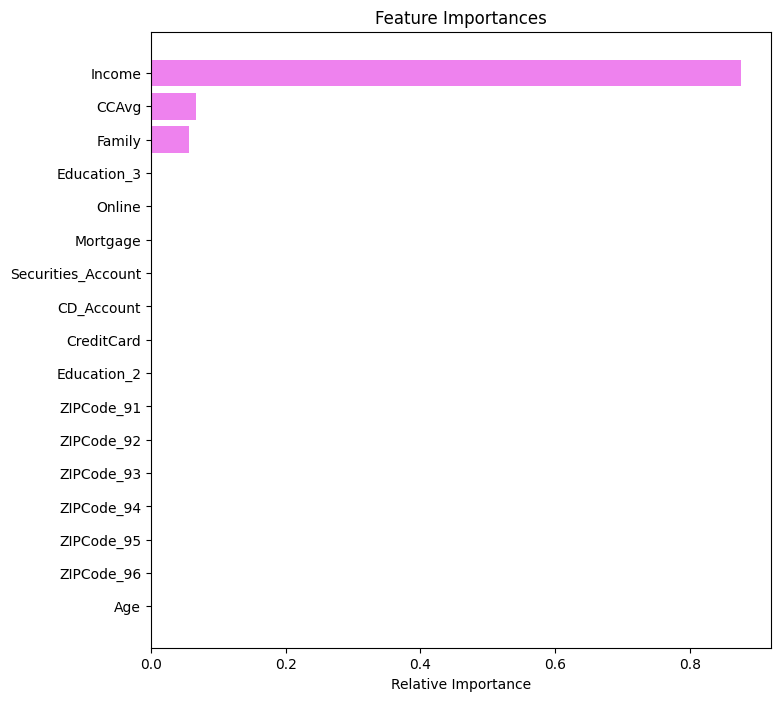

In [110]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree, Income and CCAvg are the most important features.

### Decision Tree (Post pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

#### Cost-Complexity Pruning

In [111]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [112]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.759588e-16
1,3.853725e-19,-7.755734e-16
2,4.729571e-19,-7.751004e-16
3,5.255079e-19,-7.745749e-16
4,5.255079e-19,-7.740494e-16
5,7.707449e-19,-7.732787e-16
6,1.051016e-18,-7.722277e-16
7,1.576524e-18,-7.706511e-16
8,1.257806e-17,-7.580731e-16
9,1.524700e-04,3.049400e-04


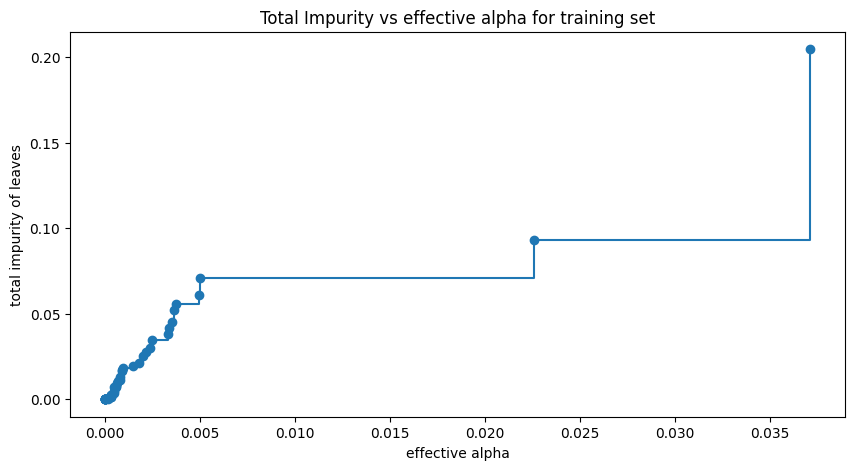

In [113]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [114]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992314


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

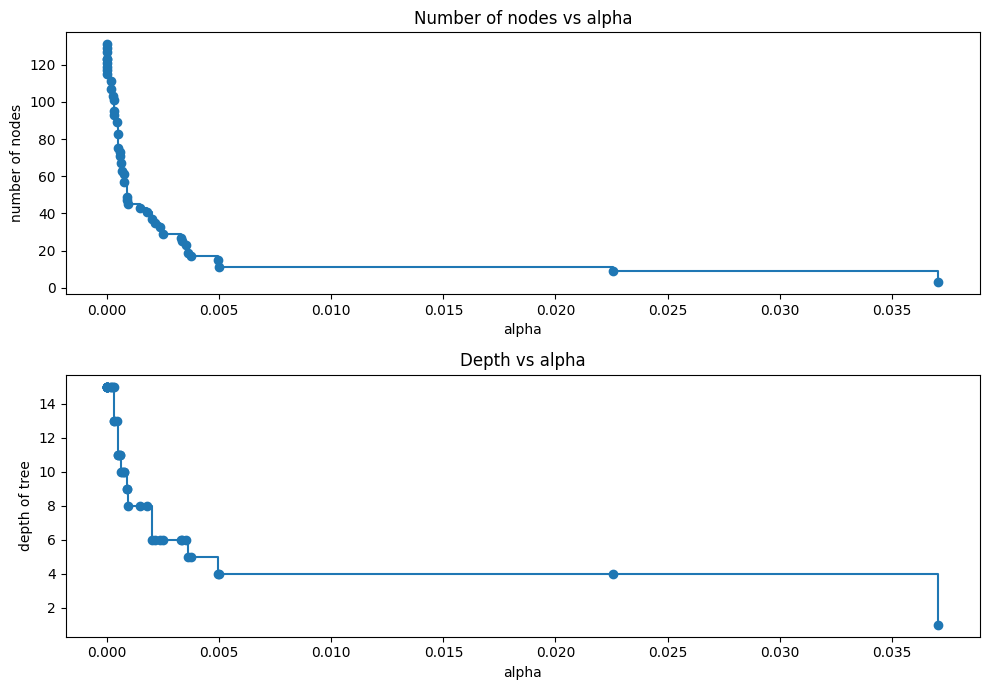

In [115]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [116]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [117]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [118]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

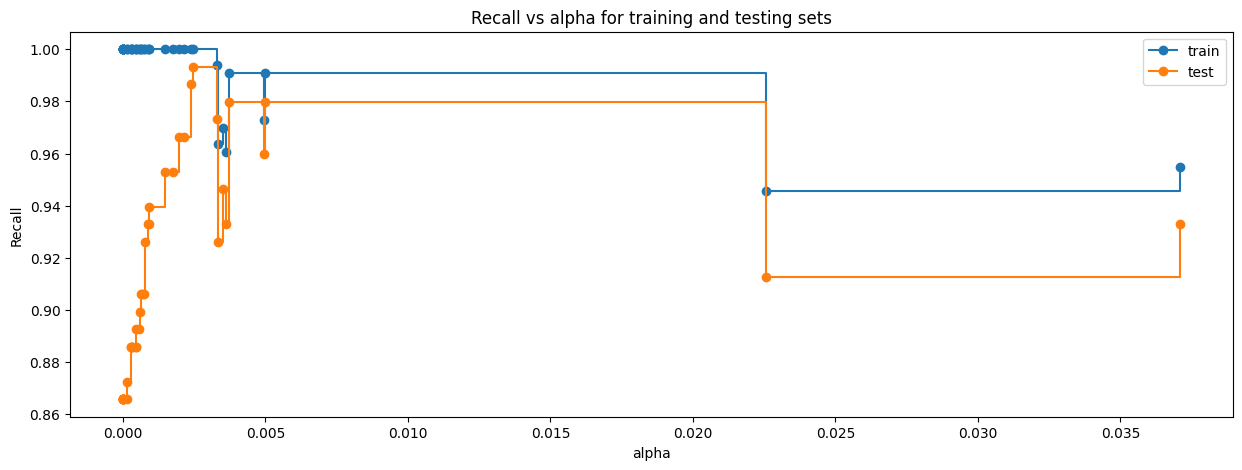

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [120]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0024726598786422157, class_weight='balanced',
                       random_state=1)


#Post Pruning

In [121]:
model4 = DecisionTreeClassifier(
    ccp_alpha=0.0025, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
model4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0025, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

**Checking performance on training data**

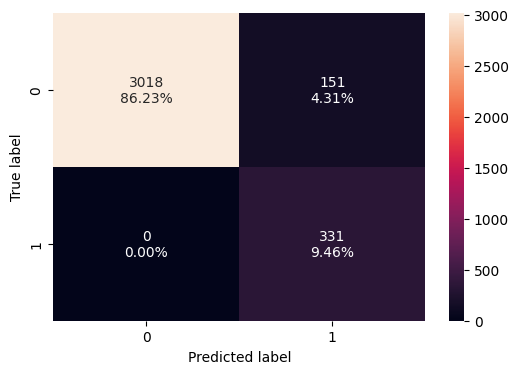

In [122]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [123]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


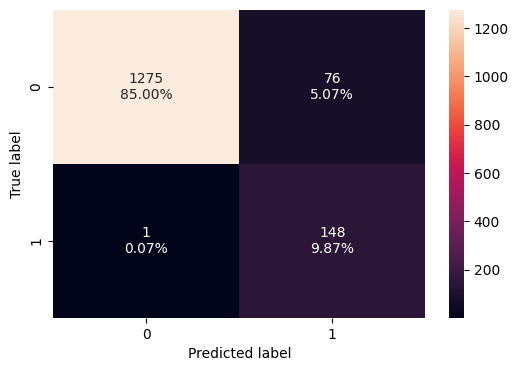

In [124]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [125]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 1 which shows that the model is able to generalize well on unseen data.

**Visualizing the Decision Tree**

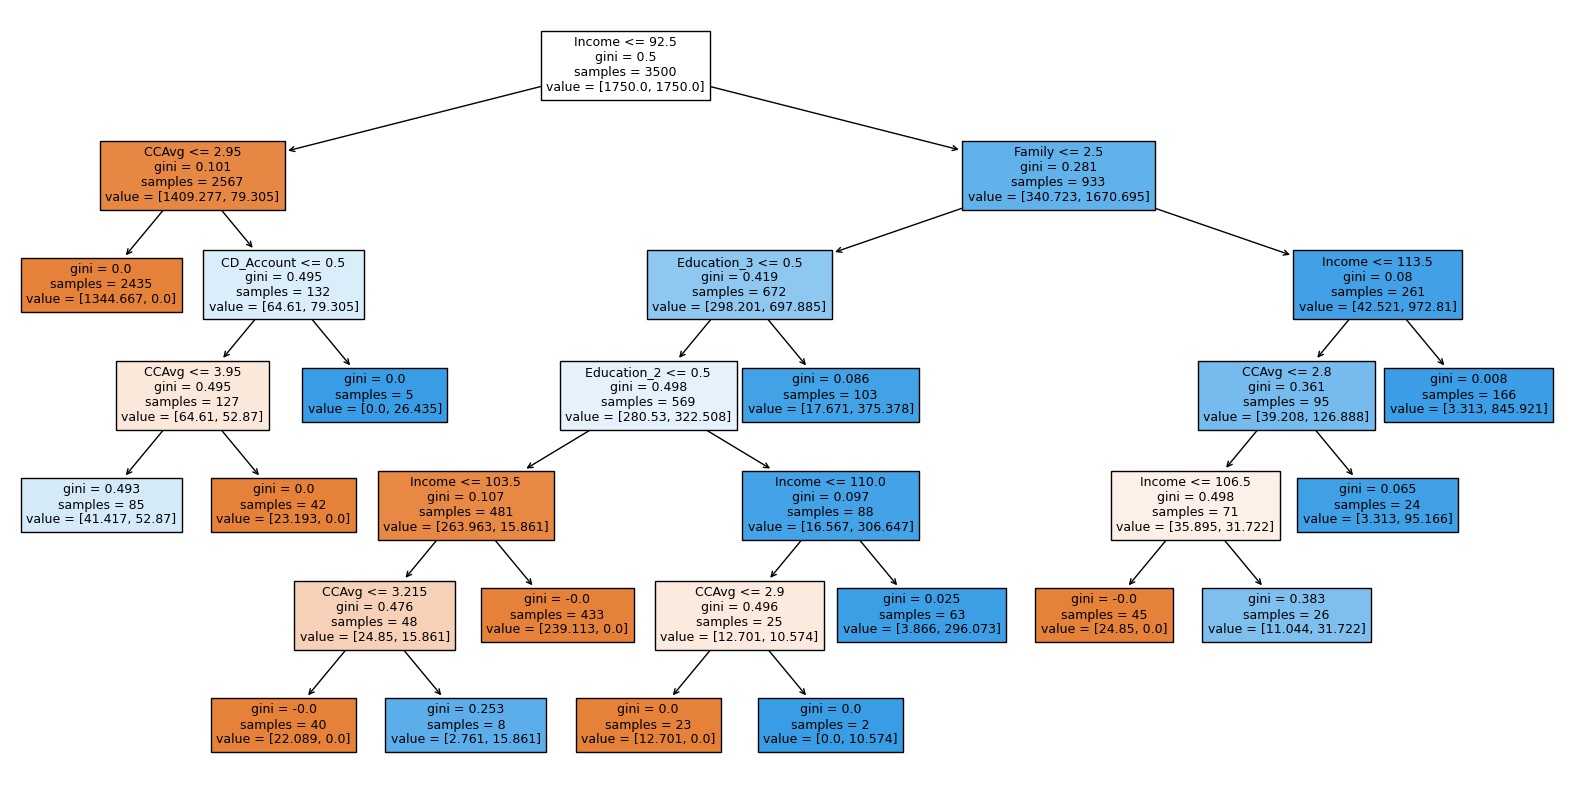

In [126]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [127]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [128]:
importances = model4.feature_importances_
indices = np.argsort(importances)

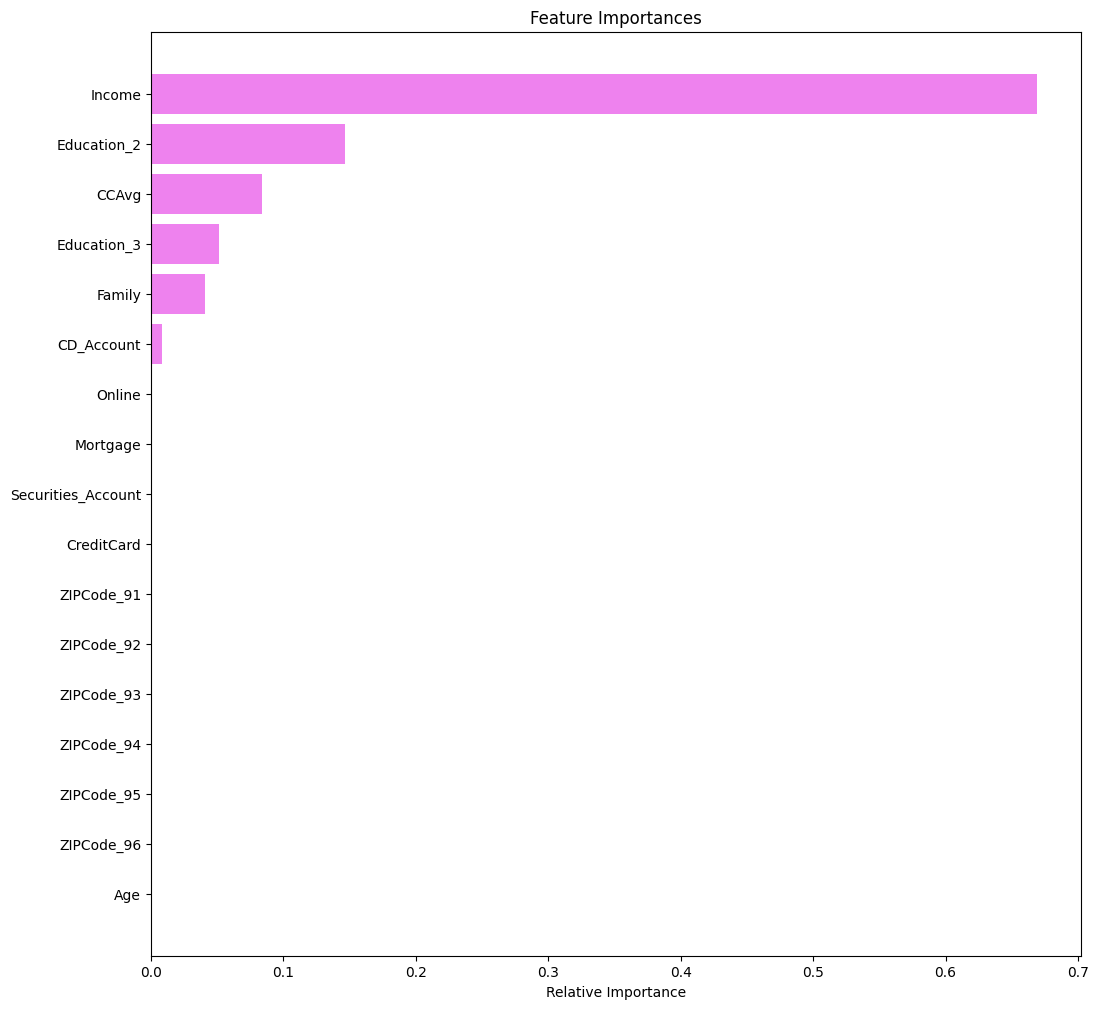

In [129]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income and Education with graduate degree and Advanced professional degree are the most important features for the post pruned tree

## Model Comparison and Final Model Selection

In [130]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [131]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.978667,0.779333,0.948667
Recall,0.932886,0.865772,1.000000,0.993289
Precision,0.926667,0.914894,0.310417,0.660714
F1,0.929766,0.889655,0.473768,0.793566


Pre-pruning (limiting tree depth) had lessened accuracy but achieves perfect recall on the training set.
Post-pruning (pruning after building the full tree) balances accuracy and recall on the test set

We can choose **Post Pruning Decision tree** as our best Model

#Summary responses to questions


1) What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
* There seems to be too many outliers
*  The distribution is said to be positively skewed or Right skewed
*  Majority of the Mortgage seemed to be present after 75 percentile. 101K to 635K

2)How many customers have credit cards?


3530 customers don't have Credit Cards

3) What are the attributes that have a strong correlation with the target attribute (personal loan)?

Personal loan is highly correlated with Income.(0.5) then Personal loan is highly correlated with CCAvg spend with Credit Cards then Personal loan is also correlated with having a Cd account

4)How does a customer's interest in purchasing a loan vary with their age?

Age seems to have very low impact on purchasing a Personal loan


5)How does a customer's interest in purchasing a loan vary with their education?

From the previous heatmap, we can see 0.14 as the correlation. So education also seems have very low impact on Personal Loan at first but a certain segment of customers with Graduate degree and Advanced degree seems have more interest  interested in purchasing the Loan

## Actionable Insights and Business Recommendations


- The model built can be used to predict if a customer is going to accept a loan or not

- We can see that income follwed by CCAvg and education are the most important factors in predicting the success rate of the customer accepting the loan

In [132]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

From the decision tree, it has been observed that

**Observation 1:**
 if the income is less than or equal to 98.5 K , the CCAvg  is less than or equal to 2.95 , the prediction is that there is failure to accept loan




**Observation 2:**
If the income is greater than 98.50K, the family size is less than or equal to 2.50, and both Education_3 and Education_2 are less than or equal to 0.50, then the prediction is success in accepting the loan

**Observation 3:**

If the income is greater than 98.50K, the family size is less than or equal to 2.50, and Education_3 is less than or equal to 0.50 while Education_2 is greater than 0.50, and the income is greater than 110.00K, then the prediction is success in accepting the loan






* What recommedations would you suggest to the bank?

Let's explore every scenario for a given observation



**Observation 1:**

**Scenario:** Customers with lower income (≤ 98.5K) and low average credit card spending (CCAvg ≤ 2.95) are predicted to have a higher likelihood of loan rejection.

*Recommendation:*

Consider targeting financial literacy programs or credit-building initiatives for this segment. Educate them about improving their financial health, managing debt, and potentially increasing their income.


**Observation 2:**

**Scenario:** Customers with higher income (> 98.50K), smaller family sizes (≤ 2.50), and specific education levels (Education_3 and Education_2 ≤ 0.50) are predicted to have a higher likelihood of loan acceptance.

*Recommendation:*

Focus marketing efforts on this group. Offer personalized loan products, competitive interest rates, and streamlined application processes. Highlight benefits such as flexible repayment terms and financial planning services.

**Observation 3:**

**Scenario:** Similar to Observation 2, but with a higher income threshold (> 110.00K).

*Recommendation:*

For customers with even higher income, emphasize premium loan offerings. Tailor communication to their financial sophistication and provide personalized advice. Consider exclusive perks or loyalty programs for this segment.

**Additional Considerations:**

**Education:** Explore whether specific educational backgrounds (Education_3 and Education_2) impact loan acceptance. Collaborate with educational institutions for joint campaigns.

**Income-CCAvg Interaction:** Investigate the interaction between income and credit card spending. Customers with high income but low CCAvg might have unique needs.

**Risk Assessment:** Balance risk and reward. While targeting high-income customers is attractive, ensure prudent risk assessment to avoid defaults.

We need to discuss these recommendations with bank and ensure that they align with Bank's business goals, risk tolerance, and customer segmentation strategy. We will need to regularly monitor model performance and adapt as needed.

___